# Teil B: Crisp-DM Real-Fallstudie



Dataset: IBM HR Analytics Employee Attrition & Performance

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

<h1> Business Understanding </h1>
Mitarbeiterabwanderung bzw. Fluktuation ist ein erhebliches Problem, welches alle Unternehmen betrifft, unabhängig von ihrer geografischen Lage, Branche und Größe. Unter Fluktuation in der Wirtschaft versteht man den Abbau von Personal und Angestellten in einem Unternehmen auf normalem Wege, z. B. durch Pensionierung und Kündigung. Nachteil hierbei ist es allerdings, dass nicht nur die Belegschaft schrumpft, sondern auch der damit einhergehende Verlust von Qualifikationen und Fähigkeiten. Dadurch entstehen hohe Kosten für das Unternehmen. Dies beinhaltet beispielsweise Kosten für die Unterbrechung des Geschäftsbereichs sowie die Einstellung und Schulung von neuen Mitarbeitern. Deshalb ist es für Unternehmen von großer Interesse, die Ursachen für die Mitarbeiterfluktuation frühzeitig zu erkennen und zu verstehen und diese im Gegenzug zu minimieren. Andererseits bringt die Fluktuation in einem Unternehmen auch Vorteile mit sich. Beispielsweise können somit Nachwuchskräfte mit vielversprechenden Qualifikationen in höhere Positionen aufsteigen. Es gibt also Vor- und Nachteile der Fluktuation.

Hierbei kommt der IBM-Datensatz ins Spiel. Dieser HR-Datensatz wurde von einem Datenwissenschaftler des Unternehmens IBM erstellt und enthält ca 1500 EInträge einer Mitarbeiterbefragung von IBM, in der angegeben wird, ob eine Fluktuation vorliegt oder nicht. Er berücksichtigt Faktoren wie Alter, Tagessatz, Abteilunbg im Unternehmen, Geschlecht, Zufriedenheit mit der Arbeit und viele weitere Faktoren, die im Bereich "Data Understanding" detailiierter betrachtet werden. Ziel ist es also in Fallbeispiel mit Hilfe dieser bekannten Faktoren die FLuktuationsrate der Mitarbeiter zu prognostizieren und somit der Personalabteilung eine Hilfestellung zu geben. In diesem Zusammenhang könnten Klassifiezierungsmodelle sowie verschiedene Tests zur Vorhersage der Kündigungswahrscheinlichekit des Mitarbeiters sinnvoll sein. Zudem ist es in einem realen Fall wichtig die menschlichen Komponente zu berücksichtigen die darin besteht, auf den Mitarbeiter zuzugehen, seine aktuelle Situation zu verstehen und Maßnahmen zu ergreifen, um kontrollierbare Faktoren zu beseitigen, die die Fluktuation des Mitarbeiters verhindern können.

Des Weiteren könnte aus den Daten, Gründe für eine Unzufriedenheit oder Benachteiligung bestimmter Mitarbeitergruppen aufgeklärt werden. Diese Aspekte gilt es ebenfalls zu untersuchen und mögliche Ursachen sowie Zusammenhänge auf Basis des Datensatzes aufzuzeigen.

Zwar ist ein gewisses Maß an Fluktuation in einem Unternehmen unvermeidlich, doch wird die Minimierung dieser Fluktuation und die Vorbereitung auf die Fälle, in denen sie nicht verhindert werden kann, die Arbeitsabläufe der meisten Unternehmen erheblich verbessern. In Zukunft könnte ein ausreichend großer Datensatz dazu verwendet werden, eine Segmentierung der Mitarbeiter vorzunehmen, um bestimmte "Risikokategorien" von Mitarbeitern zu entwickeln. Dies könnte dem Unternehmen neue Erkenntnisse darüber verschaffen, was die Fluktuation antreibt, Erkenntnisse, die durch bloße Informationsgespräche mit Mitarbeitern nicht gewonnen werden können.

In [1]:
# Bibiliotheken 
import pandas as pd # Dataframes
pd.set_option('display.max_column', None)
import numpy as np

# Libraries für Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Libraries für Dimension Reduction & Clustering
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

# Bibliotheken für Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

# Algorithmen
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

# Auswertung & Vorbereitungsmethoden
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from scipy.stats import zscore, stats
from sklearn.preprocessing import StandardScaler

#Bibliotheken für Neural Network
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

#  Data Understanding

In [2]:
# importieren des Datensatzes mit Hilfe von Pandas 
df = pd.read_csv(r"WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Zeigt mir die ersten 5 Zeilen meines Dateframes an
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
# Gibt mir informationen über die Datentypen des Datensatzes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# gibt einen statistischen Überblick über den Datensatz (beispiel: Mean, std, min, count)
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [5]:
# Datensatz wird auf fehlende Daten / Einträge geprüft
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Erstellen eine Funktion, welche jede Spalte des Datensatzes in Form eines Boxplots Plottet und
# eine Abhängigkeit zur Attrition Spalte herstellt
# Um eine Verteilung des Datensatzes zu erhalten und einen ersten Überblick zu erhalten
# Hierbei werden nur Zahlenwerte betrachtet, da noch keine Veränderung am Datensatz vorliegt 

for col in df.columns:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        print(col)
        fig = px.box(df, x = col, color = "Attrition")
        fig.update_yaxes(visible=False, showticklabels=False)
        fig.show()
    else:
        continue


Age


DailyRate


DistanceFromHome


Education


EmployeeCount


EmployeeNumber


EnvironmentSatisfaction


HourlyRate


JobInvolvement


JobLevel


JobSatisfaction


MonthlyIncome


MonthlyRate


NumCompaniesWorked


PercentSalaryHike


PerformanceRating


RelationshipSatisfaction


StandardHours


StockOptionLevel


TotalWorkingYears


TrainingTimesLastYear


WorkLifeBalance


YearsAtCompany


YearsInCurrentRole


YearsSinceLastPromotion


YearsWithCurrManager


In [7]:
# Gruppieren die Daten auf eine Ja / Nein Verteilung in der Spalte Attrition um einen Überblick anhand des Mean wertes zu erhalten
# Metrisch nicht Visuell

df.groupby("Attrition").mean()

Age   DailyRate  DistanceFromHome  Education  EmployeeCount  \
Attrition                                                                      
No         37.561233  812.504461          8.915653   2.927007            1.0   
Yes        33.607595  750.362869         10.632911   2.839662            1.0   

           EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Attrition                                                        
No            1027.656123                 2.771290   65.952149   
Yes           1010.345992                 2.464135   65.573840   

           JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
Attrition                                                             
No               2.770479  2.145985         2.778589    6832.739659   
Yes              2.518987  1.637131         2.468354    4787.092827   

            MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
Attrition                                                        
No         14265.779400            2.645580          15.231144   
Yes        14559.308017            2.940928          15.097046   

           PerformanceRating  RelationshipSatisfaction  StandardHours  \
Attrition                                                               
No                  3.153285                  2.733982           80.0   
Yes                 3.156118                  2.599156           80.0   

           StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Attrition                                                               
No                 0.845093          11.862936               2.832928   
Yes                0.527426           8.244726               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
No                2.781022        7.369019            4.484185   
Yes               2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                 
No                        2.234388              4.367397  
Yes                       1.945148              2.852321

In [8]:
# Visuelle Abhängigkeit zwischen MonthlyIncome und Age unter der Betrachtung der Attrition herstellen

px.scatter(df, x="Age", y="MonthlyIncome", color="Attrition")

In [9]:
# Visuelle Abhängigkeit zwischen  Age unter der Betrachtung der Attrition herstellen

fig = px.histogram(df, x= "Age", color= "Attrition")
fig.show()

In [10]:
# Visuelle Betrachtung 
# Education vs Age

fig = px.bar(df, x="Age", y="Education", color= "Attrition")

fig.show()

# wie viele 

In [11]:
# Visuelle Betrachtung  
# Distance & Hourly Rate

fig = px.bar(df, x="DistanceFromHome", y="HourlyRate", color= "Attrition")
fig.show()

In [12]:
# Visuelle Betrachtung 
# Attrition vs Gender

df2 = df.groupby(["Gender","Attrition"]).size().reset_index()
df2['percentage'] = df.groupby(["Gender","Attrition"]).size().groupby(level= 0).apply(lambda x: 100 * x / float(x.sum())).values
fig = px.bar(df2, x= "Gender", y= "percentage", color= "Attrition", hover_data=["Gender", 0])
fig.show()

In [13]:
# Attrition vs Job Role
# Visuelle Betrachtung 
# Prozentuale Betrachtung

df3 = df.groupby(["JobRole","Attrition"]).size().reset_index()
df3['percentage'] = df.groupby(["JobRole","Attrition"]).size().groupby(level= 0).apply(lambda x: 100 * x / float(x.sum())).values

fig = px.bar(df3, x='JobRole', y='percentage',  text='percentage', color = "Attrition", hover_data=["JobRole", 0])
fig.show()

In [14]:
# Visuelle Betrachtung 
# Monthly Income by Gender 

fig = px.box(df, y="Gender", x="MonthlyIncome", color="Gender",
          hover_data=df.columns)
fig.show()

In [15]:
# Betrachtung der Unterschiede zwischen Frauen und Männern

df.groupby(by="Gender").mean()

Age   DailyRate  DistanceFromHome  Education  EmployeeCount  \
Gender                                                                      
Female  37.329932  808.273810          9.210884   2.933673            1.0   
Male    36.653061  798.626984          9.180272   2.899093            1.0   

        EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Gender                                                                        
Female     1008.239796                 2.721088   65.903061        2.714286   
Male       1035.948980                 2.722222   65.883220        2.740363   

        JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
Gender                                                           
Female  2.117347         2.683673    6686.566327  14674.600340   
Male    2.028345         2.758503    6380.507937  14072.105442   

        NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
Gender                                                             
Female            2.812925          15.197279           3.159864   
Male              2.613379          15.217687           3.149660   

        RelationshipSatisfaction  StandardHours  StockOptionLevel  \
Gender                                                              
Female                  2.681973           80.0          0.780612   
Male                    2.732426           80.0          0.802721   

        TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
Gender                                                              
Female          11.726190               2.860544         2.763605   
Male            10.981859               2.758503         2.759637   

        YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
Gender                                                                
Female        7.231293            4.413265                 2.294218   
Male          6.859410            4.106576                 2.116780   

        YearsWithCurrManager  
Gender                        
Female              4.256803  
Male                4.034014

<h3> Erste Zwischenerkenntnis: </h3>

Das monatliche Einkommen ist positiv verzerrt.

Der Mittelwert liegt bei 6502,93 und der Median bei 4919.

Die meisten Arbeitnehmer erhalten ein Monatseinkommen, das unter dem Mittelwert und dem Median liegt, was in den meisten Unternehmen normal ist.

Obwohl der Median auffallend nah beieinander liegt, sind die Ausreißer bei den Männern relativ größer als bei den Frauen.

Frauen verdienen in diesem Datensatz im Schnitt mehr als Männer.

Es ist schwierig, aus den obigen Diagrammen Muster der Attrition zu erkennen. Wir lernen jedoch aus ihnen, dass

die Fluktuation nicht direkt mit dem Stundensatz zusammenhängt. Die Zahl der Abgänge bei Personen mit niedrigem Stundensatz ist genauso hoch wie die Zahl der Abgänge bei Personen mit hohem Stundensatz. Offenbar besteht kein direkter Zusammenhang mit einer der oben genannten Variablen. Da die Personen mit Fluktuation über den gesamten Variablenbereich verteilt sind



<h1> Data Preparation </h1>

<AxesSubplot:>

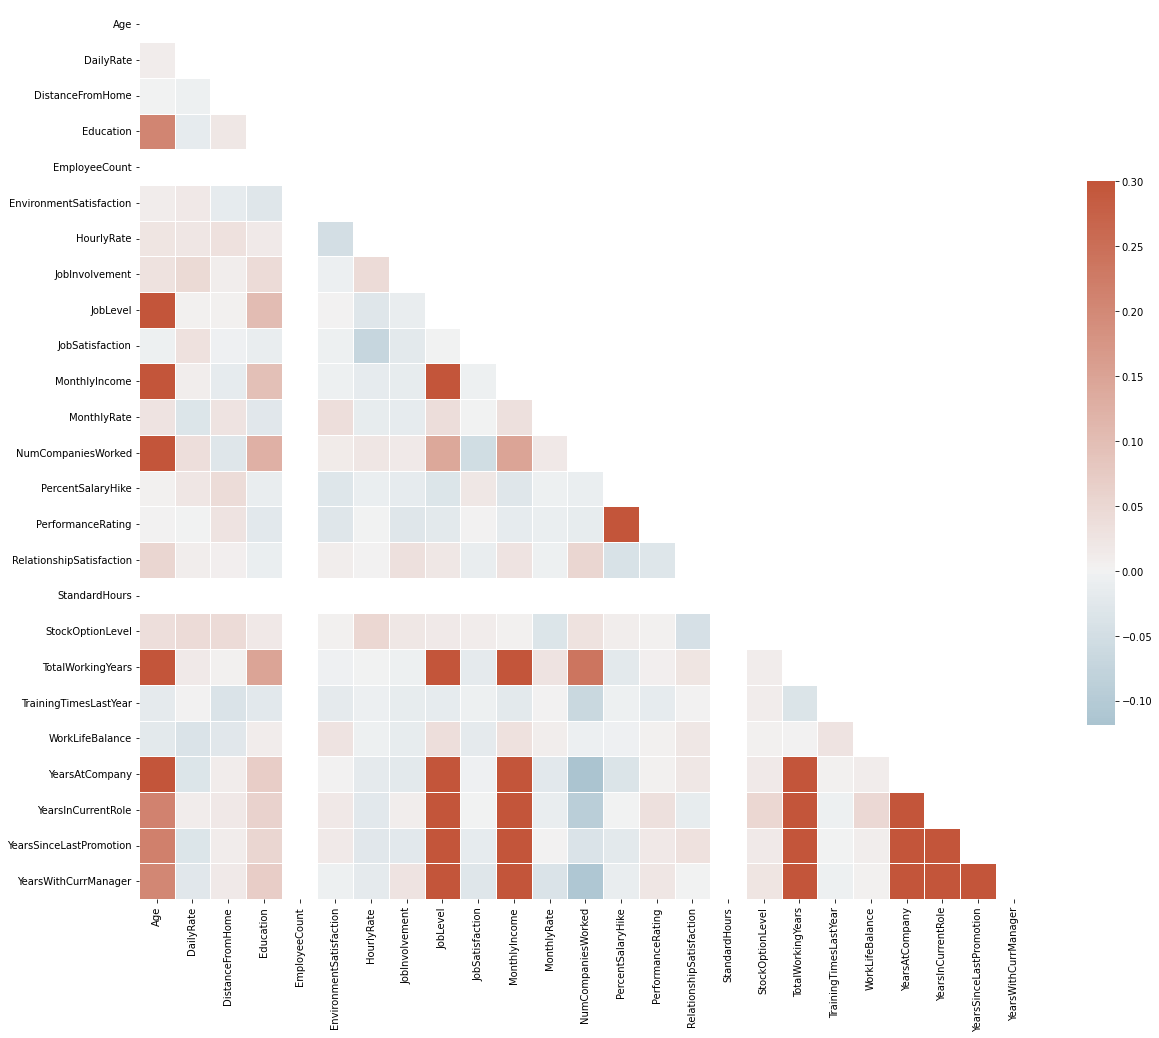

In [16]:
# Spalte Employee Number löschen
df.drop("EmployeeNumber", axis=1, inplace=True)

# Visuelle Darstellung der Verteilung Korrelation von Einzelnen Spalten miteinander 
# ....

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# erstellen der matplotlib Grafik
f, ax = plt.subplots(figsize=(20, 20))

# Erstellen einer Color Map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Erstellen der Heatmap mit der dazugehörigen Korrelation
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Gewonnene Einblicke: 

- TotalWorkingYears und JobLevel sind hoch korreliert
- TotalWorkingYears und Monatseinkommen sind hoch korreliert
- Monatseinkommen und JobLevel sind hoch korreliert
- PercentSalaryHike und PerformanceRating sind hoch korreliert
- YearsInCurrentRole und YearsAtCompany sind hoch korreliert
- YearsWithCurrManager und YearsAtCompany sind hoch korreliert

In [17]:
# Untersuchung und Ausgabe des Datensatzes nach Doppelten Einträgen
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

In [18]:
# Suche nach Einzigartigen Werten, welche im Späteren Verlauf keinen Einfluss haben und Somit Die KI beinflussen könnten oder keine Relevanz haben

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 1:
        print (col + ": " + str(unique_values))
        

EmployeeCount: [1]
Over18: ['Y']
StandardHours: [80]


In [19]:
# Suche nach Einzigartigen Werten, welche im Späteren Verlauf keinen Einfluss haben und Somit Die KI beinflussen könnten oder keine Relevanz haben
# Überblick über häufigkeit der Daten 

df.nunique().sort_values(ascending=True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
PerformanceRating              2
Attrition                      2
OverTime                       2
Gender                         2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
StockOptionLevel               4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [20]:
# Entfernen der Einzigaritgen Spalten 
df_prep = df.drop(["Over18", "StandardHours", "EmployeeCount"], axis=1)
df_prep.shape

(1470, 31)

<h2> Integer Encoding </h2>
Zum Beispiel ist "rot" eine 1, "grün" eine 2 und "blau" eine 3.

Dies wird als Label-Codierung oder Integer-Codierung bezeichnet und ist leicht umkehrbar.
Die ganzzahligen Werte stehen in einem natürlichen Ordnungsverhältnis zueinander, und Algorithmen für maschinelles Lernen können diese Beziehung verstehen und nutzen.

In [21]:
# Einzigartige Werte untersuchen
print(df["Attrition"].unique())
print(df["Gender"].unique())
print(df["OverTime"].unique())
print(df["BusinessTravel"].unique())

['Yes' 'No']
['Female' 'Male']
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [22]:
# Dictionary erstellen um Werte zu ersetzen
replace_dict = {"Attrition": {"Yes":1, "No":0},
                "Gender": {"Male":1, "Female":0},
                "OverTime": {"Yes":1, "No":0},
                "BusinessTravel": {"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2}}

# Ersetzten der Werte durch die Werte aus dem Dictionary 
df_prep = df_prep.replace(replace_dict)
# Anzeigen des veränderten Datensatzes
df_prep.head()

Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1               1       1102                   Sales   
1   49          0               2        279  Research & Development   
2   37          1               1       1373  Research & Development   
3   33          0               2       1392  Research & Development   
4   27          0               1        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0       0          94               3         2        Sales Executive   
1       1          61               2         2     Research Scientist   
2       1          92               2         1  Laboratory Technician   
3       0          56               3         1     Research Scientist   
4       1          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

<h2> Korrelationsmatrix </h2>
Darstellung der Spalten mit Integer Encoding

<AxesSubplot:>

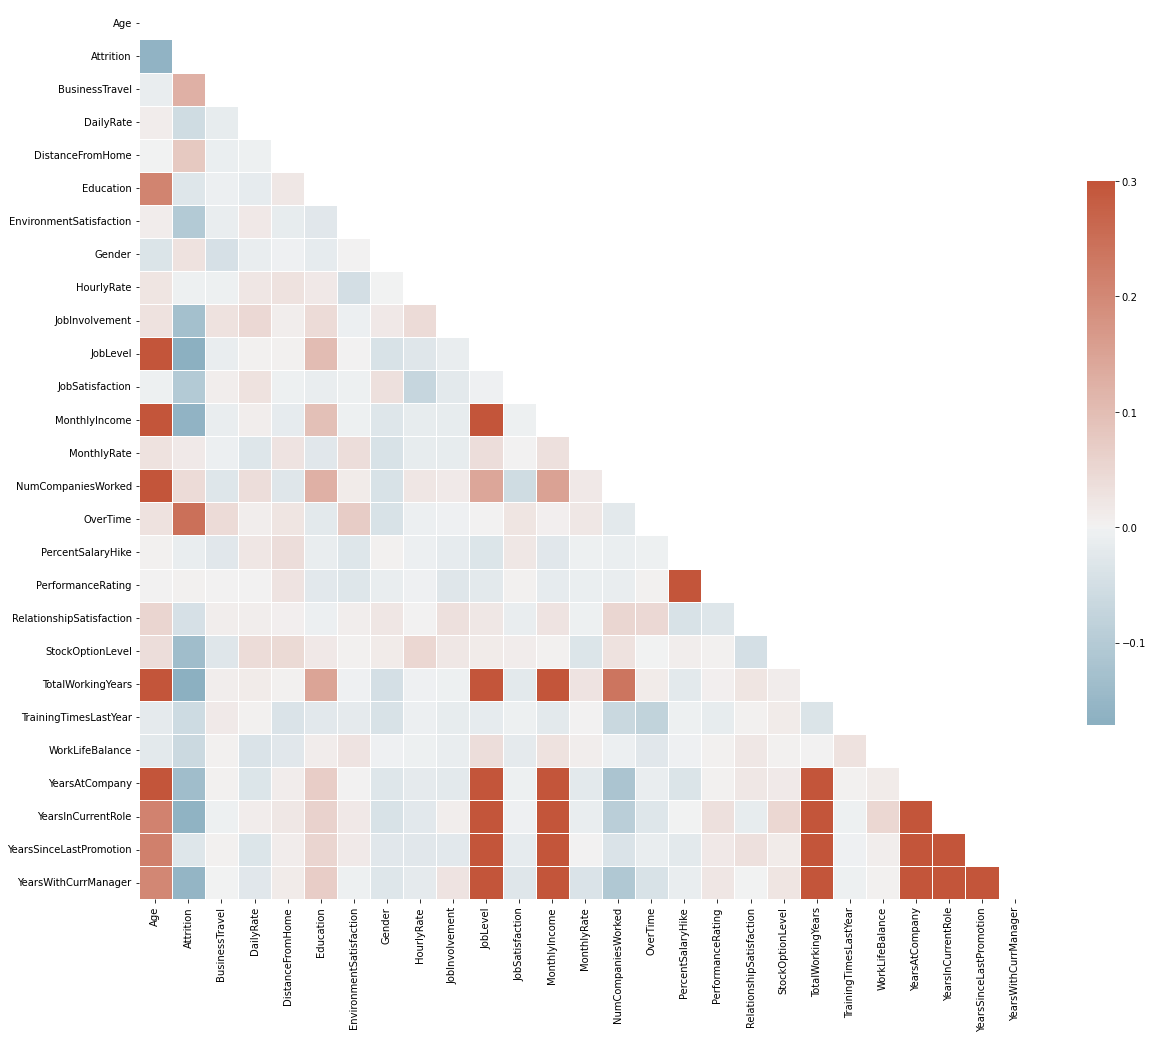

In [23]:
# Erneute Darstellung der Korrelationsmatrix um Spalten mit Integer Encoding ebenfalls darzustellen
# Korrelationen zur Spalte "Attrition" können nun vorhergesagt werden

corr = df_prep.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# erstellen der matplotlib Grafik
f, ax = plt.subplots(figsize=(20, 20))

# Erstellen einer Color Map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Erstellen der Heatmap mit der dazugehörigen Korrelation
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<h2> One-Hot Encoding </h2>
Bei kategorialen Variablen, bei denen keine derartige ordinale Beziehung besteht, ist die ganzzahlige Kodierung nicht ausreichend.
Die Verwendung dieser Kodierung und die Annahme einer natürlichen Ordnung zwischen den Kategorien durch das Modell kann zu einer schlechten Leistung oder unerwarteten Ergebnissen führen (Vorhersagen auf halbem Weg zwischen den Kategorien).

In [24]:
# Nominale Beziehungen bei den Spalten
# Untersuchung der einzelnen Berufsbezeichnungen

print(df["Department"].unique())
print(df["EducationField"].unique())
print(df["JobRole"].unique())
print(df["MaritalStatus"].unique())

['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']


In [25]:
# Veränderung der Jobrollen und Titel zu Dummy Daten -> Str zu Int 
# In einer Funktion damit wir sie später ohne Probleme falls notwendig erweitern können

def dummies(col, df):
    df_temp = pd.get_dummies(df[col], prefix=col)
    df = pd.merge(
        left=df,
        right=df_temp,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=col)
    return df

categorical_columns = ["Department", "EducationField", "JobRole", "MaritalStatus"]
for col in categorical_columns:
    df_prep = dummies(col, df_prep)
    
# Anzeigen der veränderten Daten
df_prep.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               1       1102                 1          2   
1   49          0               2        279                 8          1   
2   37          1               1       1373                 2          2   
3   33          0               2       1392                 3          4   
4   27          0               1        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                4           5993        19479                   8         1   
1                2           5130        24907                   1         0   
2                3           2090         2396                   6         1   
3                3           2909        23159                   1         1   
4                2           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_Human Resources  \
0                        0                     5                           0   
1                        1                     7                           0   
2                        0                     0                           0   
3                        3                     0                           0   
4                        2                     2                           0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0         

In [26]:
# Anzeigen der Veränderten Spalten Anzahl
df_prep.shape

(1470, 48)

In [27]:
# Subplots in Plotly verschieden Spalten werden gegenüber gestellt, welche in der Heatmap Abhängigkeit zur Attrition aufgezeigt haben

fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Scatter(x=df_prep["JobLevel"],y=df_prep["YearsAtCompany"],mode="markers", marker_color= df_prep['Attrition']),
row=1, col=1)

fig.add_trace(
go.Scatter(x=df_prep["YearsInCurrentRole"],
y=df_prep["YearsAtCompany"],
#colorscale='Viridis',
mode='markers',
marker_color=df_prep['Attrition']
#showscale=True
),
row=1, col=2
)

fig.add_trace(go.Scatter(x=df_prep["YearsSinceLastPromotion"],y=df_prep["YearsAtCompany"],mode="markers", marker_color=df_prep['Attrition']),
row=1, col=3)

fig.add_trace(go.Scatter(x=df_prep["TotalWorkingYears"],y=df_prep["YearsAtCompany"],mode="markers", marker_color=df_prep['Attrition']),
row=2, col=1)

fig.add_trace(go.Scatter(x=df_prep["YearsWithCurrManager"],y=df_prep["YearsAtCompany"],mode="markers", marker_color=df_prep['Attrition']),
row=2, col=2)

fig.add_trace(go.Scatter(x=df_prep["HourlyRate"],y=df_prep["YearsAtCompany"],mode="markers", marker_color=df_prep['Attrition']),
row=2, col=3)

fig.update_layout(height=600, width=1000, title_text="Subplots-Attrition")
fig.show()

# titel hinzufügen + achsen bezeichnung

In [28]:
# Darstellung der Korrelationen zur Spalte "Attrition"
attrition_corr = df_prep.corr()["Attrition"].drop(["Attrition"]).sort_values(ascending = False)
attrition_corr

OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel                       0.127006
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

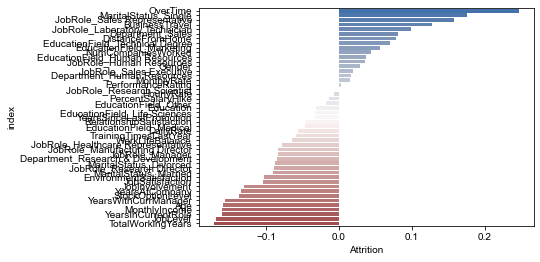

In [29]:
# Barplot-Darstellung der Korrelation zur Spalte "Attrition"
sns.barplot(data=attrition_corr.reset_index(), x="Attrition", y="index", palette="vlag")
sns.set(rc = {'figure.figsize':(20,20)})
plt.show()

Erkenntnisse / Vermutungen:
Die größten positiven & negativen Korrelationen sind zu den Spalten:
- OverTime (0.246)              --> Wer viele Überstunden macht ist eher gewillt den Job zu wechseln
- MaritalStatus_Single (0.175)  --> Single sind weniger an einen Arbeitsplatz / an einen Ort gebunden
- TotalWorkingYears (-0.171)    --> Arbeiter, die schon lange arbeiten, haben einen Job gefunden mit dem sie zufrieden sind / wollen seltener wechseln
- JobLevel (-0.169)             --> Ein höheres Job Level führt dazu, dass Mitarbeiter nicht den Job wechseln
- YearsInCurrentRole (-0.161)   --> Wer länger in einen Job ist weniger gewillt den Job zu wechseln

#  Dimension Reduction

Bei der Dimensionsreduktion versucht man einen hochdimensionalen Datensatz in einen niedrig dimensionaleren Raum zu überführen ohne dabei relevante oder wertvolle In- formationen für das weitere Data-Mining zu verlieren. Dies geschieht auf verschiedene Arten.

Hierbei wurden 3 Verschiedene Arten angewandt:
- TSNE
- PCA
- SVD

Es wurden 3 unterschiedliche verwendet um das verhalten im späteren Verlauf via Scatterplot darzustellen

In [30]:
df_prep_OA = df_prep.drop('Attrition', axis = 1)
np_prep_A = df['Attrition']
df_prep_A = pd.DataFrame(np_prep_A)

np_prep_tsne = TSNE(n_components = 2, random_state = 34).fit_transform(df_prep_OA)
np_prep_pca = PCA(n_components = 2, random_state = 34).fit_transform(df_prep_OA)
np_prep_svd = TruncatedSVD(n_components = 2, random_state = 34).fit_transform(df_prep_OA)

df_prep_tsne =pd.DataFrame(np_prep_tsne)
df_prep_pca =pd.DataFrame(np_prep_pca)
df_prep_svd = pd.DataFrame(np_prep_svd)

df_prep_AR=df_prep_A.replace({'Yes':1,'No':0})
df_prep_pca_merged =  pd.concat([df_prep_pca, df_prep_AR.reindex(df_prep_AR.index)], axis=1)
df_prep_tsne_merged = pd.concat([df_prep_tsne, df_prep_AR.reindex(df_prep_AR.index)], axis=1)
df_prep_svd_merged =  pd.concat([df_prep_svd, df_prep_AR.reindex(df_prep_AR.index)], axis=1)

df_prep_svd_merged = df_prep_svd_merged.rename({0: 'svd_1', 1: 'svd_2'}, axis=1)
df_prep_pca_merged = df_prep_pca_merged.rename({0: 'pca_1', 1: 'pca_2'}, axis=1)
df_prep_tsne_merged = df_prep_tsne_merged.rename({0: 'tsne_1', 1: 'tsne_2'}, axis=1)

print(df_prep_tsne_merged.head())
print(df_prep_svd_merged.head())
print(df_prep_pca_merged.head())


      tsne_1     tsne_2  Attrition
0  23.091425  -2.815100          1
1  48.167023   8.278097          0
2 -61.209312  10.125181          1
3  46.723579  -8.963624          0
4  14.672028 -23.774244          0
          svd_1        svd_2  Attrition
0  20324.660887 -1845.274183          1
1  24979.255723 -4724.467240          0
2   3066.193184  1049.079950          1
3  22568.544962 -6090.705707          0
4  16713.535494 -3107.485881          0
          pca_1        pca_2  Attrition
0   5140.212506  -720.188072          1
1  10529.933558 -1804.774781          0
2 -12088.374978 -3922.184162          1
3   8690.683174 -3951.631687          0
4   2193.417522 -3127.274477          0


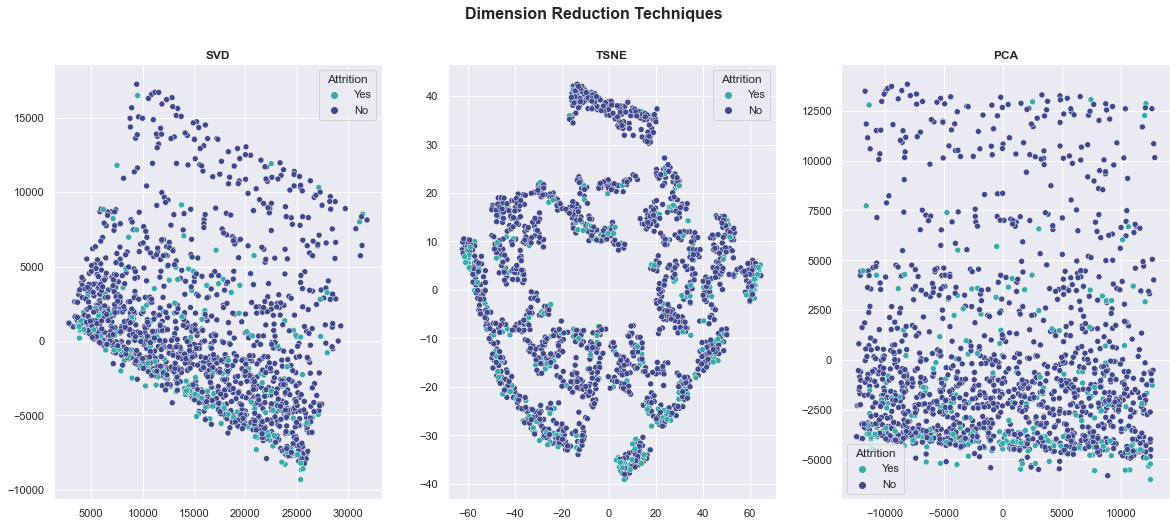

In [31]:
# plot mit outliers

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(np_prep_tsne[:,0], np_prep_tsne[:,1], hue = np_prep_A, ax = ax[1], palette = 'mako_r')
ax[1].set_title('TSNE', weight =  'bold')
sns.scatterplot(np_prep_pca[:,0], np_prep_pca[:,1], hue = np_prep_A, ax = ax[2], palette = 'mako_r')
ax[2].set_title('PCA', weight =  'bold')
sns.scatterplot(np_prep_svd[:,0],np_prep_svd[:,1], hue = np_prep_A, ax = ax[0], palette = 'mako_r')
ax[0].set_title('SVD', weight =  'bold')
fig.suptitle('Dimension Reduction Techniques', fontsize = 16, weight = 'bold') 
plt.show()

Die Verringerung der Dimensionalität mit keiner der Methoden scheint in der Lage zu sein, klare Cluster mit und ohne Abnutzung zu erstellen. Der Versuch, die Anzahl der Komponenten für die Dimensionsreduktion zu erhöhen (z. B. 3 und 4), bringt nichts. Ich habe es versucht!
Für diese Analyse werden wir keine Dimensionalitätsreduktionstechniken anwenden.

# Outlier Detection

In [32]:
z_scores = stats.zscore(df_prep)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_prep_without_outlier = df_prep[filtered_entries]
#df_prep_without_outlier.shape
#df_prep_without_outlier.head()

In [33]:
# Standardisierung
scaler = StandardScaler()
scaler.fit(df_prep_without_outlier)
df_prep_norm_without_outlier = scaler.transform(df_prep_without_outlier)
df_prep_norm_without_outlier = pd.DataFrame(df_prep_norm_without_outlier , columns=df_prep_without_outlier.columns)
df_prep_norm_without_outlier.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  \
0  0.718466   2.122206       -0.157853   0.746033         -1.028773   
1  1.687006  -0.471208        1.705834  -1.278932         -0.170932   
2 -0.250074  -0.471208        1.705834   1.459568         -0.783676   
3 -0.976479  -0.471208       -0.157853  -0.511266         -0.906224   
4 -0.371141  -0.471208        1.705834   0.507367         -0.906224   

   Education  EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement  \
0  -0.882536                -0.593680 -1.266879    1.412144        0.370888   
1  -1.862833                 0.304199  0.789341   -0.260821       -1.014264   
2   1.078059                 1.202079 -1.266879   -0.514300        0.370888   
3  -1.862833                -1.491559  0.789341   -1.325435        0.370888   
4  -0.882536                 1.202079  0.789341    0.651706        0.370888   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0  0.535402         1.096807       0.583279     0.758124            2.246434   
1  0.535402        -0.701318       0.223615     1.534589           -0.626221   
2 -0.900182         0.197745      -0.702010     1.284541           -0.626221   
3 -0.900182        -0.701318      -0.469041     0.350866            2.656813   
4 -0.900182         1.096807      -0.635745    -0.331188           -1.036600   

   OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0  1.560968          -1.152917          -0.418282                 -1.525210   
1 -0.640628           2.213847           2.390731                  1.182439   
2  1.560968          -1.152917          -0.418282                  0.279889   
3 -0.640628          -0.872354          -0.418282                  1.182439   
4 -0.640628          -0.591790          -0.418282                  0.279889   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.924096          -0.138859              -2.139409   
1          0.195835           0.255113               0.142350   
2         -0.924096          -0.138859               0.142350   
3          0.195835          -0.532831               0.142350   
4         -0.924096          -0.138859              -0.618236   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.482029        0.062692            0.102395   
1         0.385919        1.004036            1.059247   
2         0.385919        0.533364            1.059247   
3         0.385919       -0.878652           -0.535506   
4        -1.048055        0.298028            1.059247   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_Human Resources  \
0                -0.684571              0.436778                         0.0   
1                -0.276504              1.071146                         0.0   
2                 0.539629             -1.149142                         0.0   
3                 0.131562             -0.514774                         0.0   
4                 0.539629              0.753962                         0.0   

   Department_Research & Development  Department_Sales  \
0                          -1.263228          1.263228   
1                           0.791623         -0.791623   
2                           0.791623         -0.791623   
3                           0.791623         -0.791623   
4                           0.791623         -0.791623   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                      1.041859   
1                             0.0                      1.041859   
2                             0.0                      1.041859   
3                             0.0                     -0.959823   
4                             0.0                      1.041859   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                  -0.43617               -0.751068                   0.0   
1                  -0.4

<h3> K-Means Algorithmus + Outlier Detection </h3>

In [34]:
# KMeans Algorithmus trainieren
inert=[]    #Sum of squared distances
K = range(1,12)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_prep_norm_without_outlier)
    inert.append(kmeans.inertia_)
    
# inertia values for each cluster number
inertia=pd.DataFrame()
inertia['Clusters']=np.arange(1,12)
inertia['inertia']=inert

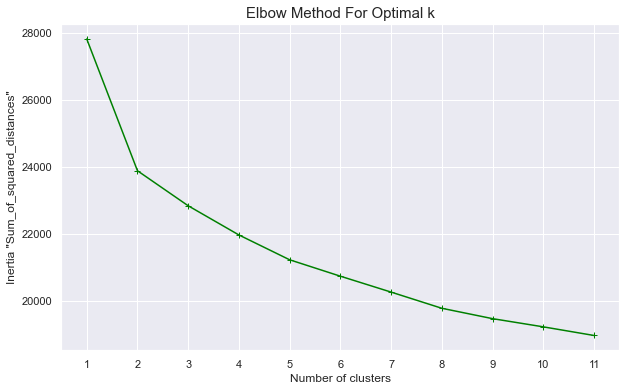

In [35]:
# ELBOW PLOT - um die beste Anzahl an Cluster zu finden
plt.figure(figsize=(10,6))
plt.plot(K,inertia['inertia'],color='green',marker='+')
plt.xticks(np.arange(1,12))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia "Sum_of_squared_distances"')
plt.title('Elbow Method For Optimal k', fontsize=15)
plt.show()

In [36]:
# Cluster berechnen
for i in range (2,12):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(df_prep_norm_without_outlier).labels_
    print("Silhouette score for k(clusters) = "+str(i)+ "  is  "
         + str(metrics.silhouette_score(df_prep_norm_without_outlier, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 2  is  0.14029518918889702
Silhouette score for k(clusters) = 3  is  0.09654180920728304
Silhouette score for k(clusters) = 4  is  0.0839970899192638
Silhouette score for k(clusters) = 5  is  0.07340532287445126
Silhouette score for k(clusters) = 6  is  0.07280478982015422
Silhouette score for k(clusters) = 7  is  0.06612312047254033
Silhouette score for k(clusters) = 8  is  0.06607988328097278
Silhouette score for k(clusters) = 9  is  0.06628951760353592
Silhouette score for k(clusters) = 10  is  0.05574296276090448
Silhouette score for k(clusters) = 11  is  0.055167874845909765


In [37]:
# kmeans Modell wurde erstellt
kmeans=KMeans(n_clusters=3 , n_init=15, random_state=10)
kmeans.fit(df_prep_norm_without_outlier)

KMeans(n_clusters=3, n_init=15, random_state=10)

In [38]:
# Dataframe mit Label "Cluster"

dfkmean=df_prep_norm_without_outlier.copy()
dfkmean['Cluster']=kmeans.labels_
dfkmean.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  \
0  0.718466   2.122206       -0.157853   0.746033         -1.028773   
1  1.687006  -0.471208        1.705834  -1.278932         -0.170932   
2 -0.250074  -0.471208        1.705834   1.459568         -0.783676   
3 -0.976479  -0.471208       -0.157853  -0.511266         -0.906224   
4 -0.371141  -0.471208        1.705834   0.507367         -0.906224   

   Education  EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement  \
0  -0.882536                -0.593680 -1.266879    1.412144        0.370888   
1  -1.862833                 0.304199  0.789341   -0.260821       -1.014264   
2   1.078059                 1.202079 -1.266879   -0.514300        0.370888   
3  -1.862833                -1.491559  0.789341   -1.325435        0.370888   
4  -0.882536                 1.202079  0.789341    0.651706        0.370888   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0  0.535402         1.096807       0.583279     0.758124            2.246434   
1  0.535402        -0.701318       0.223615     1.534589           -0.626221   
2 -0.900182         0.197745      -0.702010     1.284541           -0.626221   
3 -0.900182        -0.701318      -0.469041     0.350866            2.656813   
4 -0.900182         1.096807      -0.635745    -0.331188           -1.036600   

   OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0  1.560968          -1.152917          -0.418282                 -1.525210   
1 -0.640628           2.213847           2.390731                  1.182439   
2  1.560968          -1.152917          -0.418282                  0.279889   
3 -0.640628          -0.872354          -0.418282                  1.182439   
4 -0.640628          -0.591790          -0.418282                  0.279889   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.924096          -0.138859              -2.139409   
1          0.195835           0.255113               0.142350   
2         -0.924096          -0.138859               0.142350   
3          0.195835          -0.532831               0.142350   
4         -0.924096          -0.138859              -0.618236   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.482029        0.062692            0.102395   
1         0.385919        1.004036            1.059247   
2         0.385919        0.533364            1.059247   
3         0.385919       -0.878652           -0.535506   
4        -1.048055        0.298028            1.059247   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_Human Resources  \
0                -0.684571              0.436778                         0.0   
1                -0.276504              1.071146                         0.0   
2                 0.539629             -1.149142                         0.0   
3                 0.131562             -0.514774                         0.0   
4                 0.539629              0.753962                         0.0   

   Department_Research & Development  Department_Sales  \
0                          -1.263228          1.263228   
1                           0.791623         -0.791623   
2                           0.791623         -0.791623   
3                           0.791623         -0.791623   
4                           0.791623         -0.791623   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                      1.041859   
1                             0.0                      1.041859   
2                             0.0                      1.041859   
3                             0.0                     -0.959823   
4                             0.0                      1.041859   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                  -0.43617               -0.751068                   0.0   
1                  -0.4

In [39]:
#DIMENSION REDUCTION PCA --> für die Darstellung
df_prep_DR = dfkmean.drop('Attrition', axis = 1)
np_prep_A = df_prep_without_outlier['Attrition']
df_prep_A = pd.DataFrame(np_prep_A)
np_prep_pca = PCA(n_components = 3, random_state = 34).fit_transform(df_prep_DR)

df_prep_pca =pd.DataFrame(np_prep_pca)

#alt
#Kmean_w_outlier_df =  pd.concat([df_prep_pca, df_prep_A.reindex(df_prep_A.index)], axis=1)
#Kmean_w_outlier_df  = Kmean_w_outlier_df .rename({0: 'pca_1', 1: 'pca_2', 2:'pca_3'}, axis=1)
Kmean_w_outlier_df= pd.concat([df_prep_pca,dfkmean["Cluster"], df_prep_A.reindex(df_prep_pca.index)], axis=1)
Kmean_w_outlier_df  = Kmean_w_outlier_df .rename({0: 'pca_1', 1: 'pca_2', 2:'pca_3'}, axis=1)
Kmean_w_outlier_df.shape
print(Kmean_w_outlier_df)

        pca_1     pca_2     pca_3  Cluster  Attrition
0    1.733097 -1.872313 -1.635110        1        1.0
1   -0.220027  2.576592 -0.488312        0        0.0
2   -1.399556  1.378029 -0.929022        0        NaN
3   -2.194265 -0.366058  1.847234        2        0.0
4   -1.410932  1.420689 -1.284895        2        0.0
..        ...       ...       ...      ...        ...
727  4.322472 -2.182756  0.813413        1        0.0
728  6.934604  2.273407 -0.220320        1        NaN
729 -1.018973  0.953452  1.857950        2        NaN
730  2.816708  0.602369  0.358088        1        NaN
731 -1.248678  0.293035  1.511482        2        1.0

[732 rows x 5 columns]


In [40]:
# 3D-Darstellung der Daten
fig = px.scatter_3d(Kmean_w_outlier_df, x='pca_1', y='pca_2', z='pca_3',color='Cluster')
fig.show()

IQR-METHODE


Bei dieser Methode werden Ausreißer durch die Verwendung des Interquartilsbereichs (IQR) ermittelt. Jeder Wert, der außerhalb des Bereichs von -1,5 x IQR bis 1,5 x IQR liegt, wird als Ausreißer behandelt.

* Q1 steht für das 1. Quartil/25. Perzentil der Daten.
* Q2 steht für das 2. Quartil/Median/50. Perzentil der Daten.
* Q3 steht für das 3. Quartil/75. Perzentil der Daten.
* (Q1-1,5*IQR) steht für den kleinsten Wert im Datensatz und (Q3+1,5*IQR) für den größten Wert im Datensatz.


IQR-METHODE

In [41]:
# Funktion zum Erkennen von Outliers erstellen
def qr_outliers(col):
    outliers = []
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [42]:
# Wir geben uns alle Ermittelten Ausreisser aus damit wir diese im späteren Verlauf eventuell verwenden können

col_outliers = []
for col in df.columns:
    if df[col].dtype == 'O' : continue
    else : 
        outliers = qr_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

MonthlyIncome : [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Perform

In [43]:
# checken ob von den outliers nochmal unique werte vorhanden oder ob diese ein neues Muster bilden

print('NumCompaniesWorked:', df.NumCompaniesWorked.unique())
print('PerformanceRating:', df.PerformanceRating.unique())
print('StockOptionLevel:', df.StockOptionLevel.unique())

NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
PerformanceRating: [3 4]
StockOptionLevel: [0 1 3 2]


# Standardisierung

StandardScaler ist der Standardalgorithmus der Branche .

StandardScaler standardisiert ein Merkmal durch Subtraktion des Mittelwerts und anschließende Skalierung auf die Einheitsvarianz. Einheitsvarianz bedeutet, dass alle Werte durch die Standardabweichung geteilt werden.

StandardScaler führt zu einer Verteilung mit einer Standardabweichung von 1. Die Varianz ist ebenfalls gleich 1,
da Varianz = Standardabweichung zum Quadrat. Und 1 zum Quadrat = 1.
StandardScaler macht den Mittelwert der Verteilung zu 0. Etwa 68 % der Werte liegen zwischen -1 und 1.



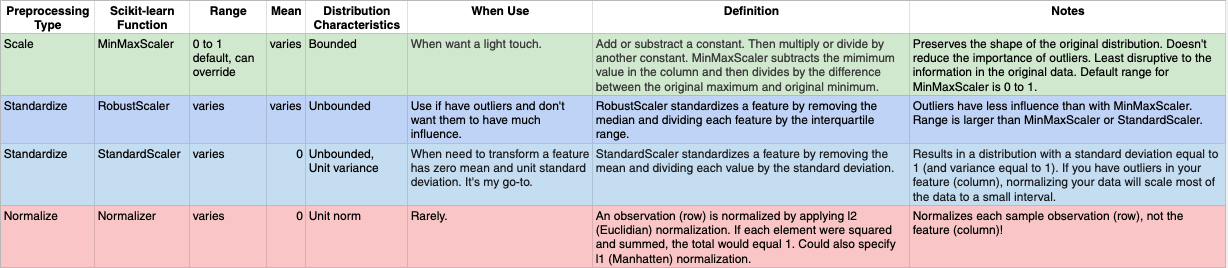

In [44]:
# Standardisierung von den Daten
scaler = StandardScaler()
scaler.fit(df_prep)
df_prep_norm = scaler.transform(df_prep)
df_prep_norm  = pd.DataFrame(df_prep_norm, columns=df_prep.columns)
df_prep_norm.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  \
0  0.446350   2.280906       -0.162399   0.742527         -1.010909   
1  1.322365  -0.438422        1.717339  -1.297775         -0.147150   
2  0.008343   2.280906       -0.162399   1.414363         -0.887515   
3 -0.429664  -0.438422        1.717339   1.461466         -0.764121   
4 -1.086676  -0.438422       -0.162399  -0.524295         -0.887515   

   Education  EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement  \
0  -0.891688                -0.660531 -1.224745    1.383138        0.379672   
1  -1.868426                 0.254625  0.816497   -0.240677       -1.026167   
2  -0.891688                 1.169781  0.816497    1.284725       -1.026167   
3   1.061787                 1.169781 -1.224745   -0.486709        0.379672   
4  -1.868426                -1.575686  0.816497   -1.274014        0.379672   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0 -0.057788         1.153254      -0.108350     0.726020            2.125136   
1 -0.057788        -0.660853      -0.291719     1.488876           -0.678049   
2 -0.961486         0.246200      -0.937654    -1.674841            1.324226   
3 -0.961486         0.246200      -0.763634     1.243211           -0.678049   
4 -0.961486        -0.660853      -0.644858     0.325900            2.525591   

   OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0  1.591746          -1.150554          -0.426230                 -1.584178   
1 -0.628241           2.129306           2.346151                  1.191438   
2  1.591746          -0.057267          -0.426230                 -0.658973   
3  1.591746          -1.150554          -0.426230                  0.266233   
4 -0.628241          -0.877232          -0.426230                  1.191438   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.932014          -0.421642              -2.171982   
1          0.241988          -0.164511               0.155707   
2         -0.932014          -0.550208               0.155707   
3         -0.932014          -0.421642               0.155707   
4          0.241988          -0.678774               0.155707   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.493820       -0.164613           -0.063296   
1         0.338096        0.488508            0.764998   
2         0.338096       -1.144294           -1.167687   
3         0.338096        0.161947            0.764998   
4         0.338096       -0.817734           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_Human Resources  \
0                -0.679146              0.245834                   -0.211604   
1                -0.368715              0.806541                   -0.211604   
2                -0.679146             -1.155935                   -0.211604   
3                 0.252146             -1.155935                   -0.211604   
4                -0.058285             -0.595227                   -0.211604   

   Department_Research & Development  Department_Sales  \
0                          -1.374051          1.515244   
1                           0.727775         -0.659960   
2                           0.727775         -0.659960   
3                           0.727775         -0.659960   
4                           0.727775         -0.659960   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                       -0.136788                      1.194045   
1                       -0.136788                      1.194045   
2                       -0.136788                     -0.837490   
3                       -0.136788                      1.194045   
4                       -0.136788                     -0.837490   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                 -0.348255               -0.679141             -0.243059   
1                 -0.34

In [45]:
# Überblick über Statistische Verteilung nach der Normierung

df_prep_norm.describe()

Age     Attrition  BusinessTravel     DailyRate  \
count  1.470000e+03  1.470000e+03    1.470000e+03  1.470000e+03   
mean  -4.017950e-17 -7.106938e-17    4.739217e-18  7.197568e-17   
std    1.000340e+00  1.000340e+00    1.000340e+00  1.000340e+00   
min   -2.072192e+00 -4.384223e-01   -2.042138e+00 -1.736576e+00   
25%   -7.581700e-01 -4.384223e-01   -1.623992e-01 -8.366616e-01   
50%   -1.011589e-01 -4.384223e-01   -1.623992e-01 -1.204135e-03   
75%    6.653541e-01 -4.384223e-01   -1.623992e-01  8.788772e-01   
max    2.526886e+00  2.280906e+00    1.717339e+00  1.726730e+00   

       DistanceFromHome     Education  EnvironmentSatisfaction        Gender  \
count      1.470000e+03  1.470000e+03             1.470000e+03  1.470000e+03   
mean       5.164048e-17  2.697011e-16             7.054070e-17  7.205121e-17   
std        1.000340e+00  1.000340e+00             1.000340e+00  1.000340e+00   
min       -1.010909e+00 -1.868426e+00            -1.575686e+00 -1.224745e+00   
25%       -8.875151e-01 -8.916883e-01            -6.605307e-01 -1.224745e+00   
50%       -2.705440e-01  8.504925e-02             2.546249e-01  8.164966e-01   
75%        5.932157e-01  1.061787e+00             1.169781e+00  8.164966e-01   
max        2.444129e+00  2.038524e+00             1.169781e+00  8.164966e-01   

         HourlyRate  JobInvolvement      JobLevel  JobSatisfaction  \
count  1.470000e+03    1.470000e+03  1.470000e+03     1.470000e+03   
mean   1.728021e-16   -6.495182e-18  1.479542e-16    -7.816876e-18   
std    1.000340e+00    1.000340e+00  1.000340e+00     1.000340e+00   
min   -1.766079e+00   -2.432006e+00 -9.614864e-01    -1.567907e+00   
25%   -8.803615e-01   -1.026167e+00 -9.614864e-01    -6.608532e-01   
50%    5.355811e-03    3.796721e-01 -5.778755e-02     2.462002e-01   
75%    8.787715e-01    3.796721e-01  8.459113e-01     1.153254e+00   
max    1.678377e+00    1.785511e+00  2.653309e+00     1.153254e+00   

       MonthlyIncome   MonthlyRate  NumCompaniesWorked      OverTime  \
count   1.470000e+03  1.470000e+03        1.470000e+03  1.470000e+03   
mean   -5.403841e-17  2.394154e-17       -5.588878e-17  2.354881e-16   
std     1.000340e+00  1.000340e+00        1.000340e+00  1.000340e+00   
min    -1.167343e+00 -1.717284e+00       -1.078504e+00 -6.282411e-01   
25%    -7.632087e-01 -8.806440e-01       -6.780494e-01 -6.282411e-01   
50%    -3.365516e-01 -1.090645e-02       -2.775943e-01 -6.282411e-01   
75%     3.986245e-01  8.641014e-01        5.233157e-01  1.591746e+00   
max     2.867626e+00  1.782888e+00        2.525591e+00  1.591746e+00   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count       1.470000e+03       1.470000e+03              1.470000e+03   
mean        2.479498e-16      -7.766274e-16             -1.910792e-16   
std         1.000340e+00       1.000340e+00              1.000340e+00   
min        -1.150554e+00      -4.262300e-01             -1.584178e+00   
25%        -8.772324e-01      -4.262300e-01             -6.589728e-01   
50%        -3.305891e-01      -4.262300e-01              2.662326e-01   
75%         7.626976e-01      -4.262300e-01              1.191438e+00   
max         2.675949e+00       2.346151e+00              1.191438e+00   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count      1.470000e+03       1.470000e+03           1.470000e+03   
mean       6.600918e-17      -9.236753e-17          -1.106069e-16   
std        1.000340e+00       1.000340e+00           1.000340e+00   
min       -9.320144e-01      -1.450167e+00          -2.171982e+00   
25%       -9.320144e-01      -6.787735e-01          -6.201892e-01   
50%        2.419883e-01      -1.645114e-01           1.557071e-01   
75%        2.419883e-01       4.783162e-01           1.557071e-01   
max        2.589994e+00       3.692454e+00           2.483396e+00   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count     1.470000e+03    1.470000e+03        1.470000e+03   
mean   

# DBSCAN 

DBSCAN ist ein dichtebasierter Clustering-Algorithmus, der einen Datensatz in Untergruppen von Regionen mit hoher Dichte unterteilt und Cluster mit hoher Dichte als Ausreißer identifiziert. Dabei zeigt Cluster -1 an, dass der Cluster einen Ausreißer enthält und die übrigen Cluster keine Ausreißer haben. Dieser Ansatz ähnelt dem K-Mittelwert-Clustering. Für DBSCAN sind zwei Parameter erforderlich. DBSCAN liefert die besten Ergebnisse für die multivariate Ausreißererkennung.

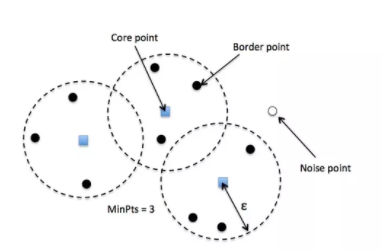

In [46]:
# Durchführung der Cluster Analyse mit DBSCAN

# Epsilon Wert ermittelt 
epsilon=df_prep_norm.std().mean()/0.17
print(epsilon)
# Speichern des Algorithmus mit den notwendigen Einstellungen auf Variable "db" und Start des Trainings
db = DBSCAN(eps=epsilon, min_samples=5).fit(df_prep_norm)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Anzahl an Cluster berechnen
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Labels als DataFrame übernehmen
DBSCAN_labels = pd.DataFrame(labels)
DBSCAN_labels.columns = [ "Cluster"]
DBSCAN_labels["Size"] = labels
DBSCAN_labels["Cluster"].replace({-1: "outlier"}, inplace=True) # Alle Outlier als "Outlier" bezeichnen
DBSCAN_labels.loc[DBSCAN_labels['Size'] >=  0, 'Size'] = 3.5 
DBSCAN_labels.loc[DBSCAN_labels['Size'] < 0 , 'Size'] = 1

# PCA anwenden
DB_pca = PCA(n_components=2)
DB_pca = DB_pca.fit(df_prep_norm)
digits_np_pca = DB_pca.transform(df_prep_norm)
digits_np_pca_DF=pd.DataFrame(digits_np_pca)
header= ["np_pca_column_1","np_pca_column_2"]    
digits_np_pca_DF.columns=header

DBSCAN_pca = (pd.concat([digits_np_pca_DF,DBSCAN_labels], axis = 1))
# Darstellung der DBSCAN_pca
fig = px.scatter(DBSCAN_pca, x ="np_pca_column_1", y ="np_pca_column_2",
                 color="Cluster",

                 size="Size",
                 hover_name= "Cluster",                                
                 color_discrete_map={"outlier": "black",
                    0:"brown",
                    1: "dimgrey",
                    2:"gold",
                    3:"forestgreen",
                    4:"purple",
                    5: "silver",
                    6: "green",
                    7: "red",
                    8:"Blue",
                    9: "indigo",
                    10:"maroon",
                    11:"midnightblue",
                    12:"aqua",
                    13:"lightgreen",
                    14:"yellow",
                    15:"punk"},
                 #hover_data=["Sound-Counter", "Sound AV-Av-AverageProcessing"])
                 hover_data={'Size':False, # remove Size from hover data
                             'np_pca_column_1':False, # remove np_pca_column_1 from hover data
                             'np_pca_column_2':False, # remove np_pca_column_2 from hover data
                             'Cluster':':.2f', # customize hover for column of y attribute
                            },    
                )
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_xaxes(visible=False, showticklabels=False)
fig.show()

5.884354762892126


Anmerkung: Darstellung der Cluster ist im zweidimensionalen Raum nicht gut möglich.

<h2> Train / Test Split </h2>

In [47]:
# Sicherung des bearbeiteten Datensatzes
df_prep.to_csv("df_prep.csv")

In [48]:
#Aufteilung in Trainings (75%)- und Testdaten (25%)
train, test = train_test_split(df_prep, test_size=0.25, random_state=734, shuffle=True)
x_train = train.drop("Attrition", axis=1)
y_train = train["Attrition"]

x_test = test.drop("Attrition", axis=1)
y_test = test["Attrition"]

In [49]:
# Training ohne Oversampling (SMOTE) --> Gute Genauigkeit, aber nur Vorhersage auf "Keine Attrition"
clf = RandomForestClassifier(max_depth= 2, random_state= 0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Genauigkeit: " + str(round(clf.score(x_test, y_test), 3)))

# Confusion Matrix schön plotten
print(confusion_matrix(y_test, y_pred))

Genauigkeit: 0.834
[[307   0]
 [ 61   0]]


<h2> SMOTE </h2>

Was ist SMOTE? Die SMOTE- oder Synthetic Minority Oversampling-Technik ist eine Oversampling-Technik, aber SMOTE funktioniert anders als das typische Oversampling.

Bei einer klassischen Oversampling-Technik werden die Minderheitsdaten aus der Minderheitsdatenpopulation dupliziert. Während es die Anzahl der Daten erhöht, gibt es keine neuen Informationen oder Variationen zum Modell des maschinellen Lernens.

Aus einem der oben genannten Gründe haben Nitesh Chawla et al. (2002) führen in ihrem SMOTE-Papier eine neue Technik zur Erstellung synthetischer Daten für Oversampling-Zwecke ein .

SMOTE arbeitet mit einem k-Nearest-Neighbour- Algorithmus, um synthetische Daten zu erstellen. SMOTE wählt zunächst zufällige Daten aus der Minderheitsklasse aus, dann werden k-nächste Nachbarn aus den Daten festgelegt. Synthetische Daten würden dann zwischen den Zufallsdaten und dem zufällig ausgewählten k-nächsten Nachbarn erstellt. Lassen Sie mich Ihnen das folgende Beispiel zeigen.

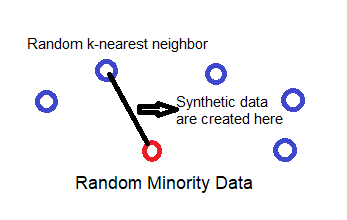

In [50]:
# Vergleich der Verteilung der Werte
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [51]:
# Anwendung vom SMOTE Algorithmus und Neurverteilung der Klassen --> gleich verteilt
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
y_train.value_counts()

0    926
1    926
Name: Attrition, dtype: int64

In [52]:
# Test mit dem RandomForestClassifier

clf = RandomForestClassifier(max_depth= 10, random_state= 0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.8260869565217391

In [53]:
# Confusion Matrix  plotten --> Das ERgebnis ist besser (es wird z.T. auch keine Attrition vorhergesagt)
print(confusion_matrix(y_test, y_pred))

[[292  15]
 [ 49  12]]


<h2> Klassifizierung </h2>

<h3> Random Forest </h3>

In [54]:
# Listen erstellen, welche mehrmals durchgegangen werden um Algorithmus mit unterschiedlichen Parametern zu trainieren
max_depth_list = [10, 50, 100]
ergebnisse = []
random_state_list = [0, 1, 2, 3]

# Training des Random Forest Algorithmus mit verschiedenen Parametern
# Ergebnisse werden in der Ergebnisliste gespeichert
for max_depth in max_depth_list:
    for random_state in random_state_list:
        clf = RandomForestClassifier(max_depth= max_depth, random_state= random_state)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        ergebnisse.append(["Random Forest Classifier", clf.score(x_test, y_test), confusion_matrix(y_test, y_pred), max_depth, random_state])


In [55]:
# Ergebnisse werden in einem Dataframe gespeichert
columns_list = ["Algorithmus", "Genauigkeit", "Confusion Matrix", "Max Depth", "Random State"]
ergebnisse_RandomForest = pd.DataFrame(ergebnisse, columns = columns_list)
ergebnisse_RandomForest

Algorithmus  Genauigkeit       Confusion Matrix  Max Depth  \
0   Random Forest Classifier     0.826087  [[292, 15], [49, 12]]         10   
1   Random Forest Classifier     0.820652   [[293, 14], [52, 9]]         10   
2   Random Forest Classifier     0.828804  [[293, 14], [49, 12]]         10   
3   Random Forest Classifier     0.817935   [[292, 15], [52, 9]]         10   
4   Random Forest Classifier     0.823370   [[295, 12], [53, 8]]         50   
5   Random Forest Classifier     0.820652   [[293, 14], [52, 9]]         50   
6   Random Forest Classifier     0.820652   [[294, 13], [53, 8]]         50   
7   Random Forest Classifier     0.823370   [[296, 11], [54, 7]]         50   
8   Random Forest Classifier     0.823370   [[295, 12], [53, 8]]        100   
9   Random Forest Classifier     0.820652   [[293, 14], [52, 9]]        100   
10  Random Forest Classifier     0.820652   [[294, 13], [53, 8]]        100   
11  Random Forest Classifier     0.823370   [[296, 11], [54, 7]]        100   

    Random State  
0              0  
1              1  
2              2  
3              3  
4              0  
5              1  
6              2  
7              3  
8              0  
9              1  
10             2  
11             3

In [56]:
# Bestes Ergebnis in einen neuen Datensatz schreiben 
ergebnisse_df = pd.DataFrame(columns = columns_list) 
ergebnisse_df = ergebnisse_df.append(ergebnisse_RandomForest[ergebnisse_RandomForest["Genauigkeit"] == ergebnisse_RandomForest["Genauigkeit"].max()].iloc[0]).reset_index(drop=True)

<h3> Decision Tree </h3>

In [57]:
# Selber Schritt wird jetzt auch beim Decision Tree mit verschiedenen Parametern durchgeführt
max_depth_list = [10, 50, 100]
random_state_list = [0, 1, 2, 3]
ergebnisse = []

for max_depth in max_depth_list:
    for random_state in random_state_list:
        clf = DecisionTreeClassifier(max_depth= max_depth, random_state= random_state)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        ergebnisse.append(["Decision Tree Classifier", clf.score(x_test, y_test), confusion_matrix(y_test, y_pred), max_depth, random_state])

In [58]:
# Ergebnisse werden in einem Dataframe gespeichert
columns_list = ["Algorithmus", "Genauigkeit", "Confusion Matrix", "Max Depth", "Random State"]
ergebnisse_Decision_Tree = pd.DataFrame(ergebnisse, columns = columns_list)
ergebnisse_Decision_Tree

Algorithmus  Genauigkeit       Confusion Matrix  Max Depth  \
0   Decision Tree Classifier     0.755435  [[259, 48], [42, 19]]         10   
1   Decision Tree Classifier     0.766304  [[263, 44], [42, 19]]         10   
2   Decision Tree Classifier     0.758152  [[261, 46], [43, 18]]         10   
3   Decision Tree Classifier     0.752717  [[260, 47], [44, 17]]         10   
4   Decision Tree Classifier     0.747283  [[256, 51], [42, 19]]         50   
5   Decision Tree Classifier     0.747283  [[254, 53], [40, 21]]         50   
6   Decision Tree Classifier     0.755435  [[255, 52], [38, 23]]         50   
7   Decision Tree Classifier     0.755435  [[258, 49], [41, 20]]         50   
8   Decision Tree Classifier     0.747283  [[256, 51], [42, 19]]        100   
9   Decision Tree Classifier     0.747283  [[254, 53], [40, 21]]        100   
10  Decision Tree Classifier     0.755435  [[255, 52], [38, 23]]        100   
11  Decision Tree Classifier     0.755435  [[258, 49], [41, 20]]        100   

    Random State  
0              0  
1              1  
2              2  
3              3  
4              0  
5              1  
6              2  
7              3  
8              0  
9              1  
10             2  
11             3

In [59]:
# Bestes Ergebnis in den Ergebnis-Datensatz geschrieben 
ergebnisse_df = ergebnisse_df.append(ergebnisse_Decision_Tree[ergebnisse_Decision_Tree["Genauigkeit"] == ergebnisse_Decision_Tree["Genauigkeit"].max()].iloc[0]).reset_index(drop=True)
ergebnisse_df = ergebnisse_df.drop(columns=["Max Depth", "Random State"])
ergebnisse_df

Algorithmus  Genauigkeit       Confusion Matrix
0  Random Forest Classifier     0.828804  [[293, 14], [49, 12]]
1  Decision Tree Classifier     0.766304  [[263, 44], [42, 19]]

<h3> Neural Network </h3>

In [60]:
# Normalisieren für Neuronales Netz

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_normalized_all = sc.fit_transform(x_train)
x_test_normalized = sc.transform(x_test)

# Zusätzliche Aufteilung in Trainings- / Validierungs- und Testdatensatz

x_train_normalized, x_validation, y_train, y_validation = train_test_split(x_train_normalized_all, y_train, test_size=0.2, random_state=42)

In [61]:
# Festlegen der Learning Rate
lr = 0.01

#Aufbau des neuronalen Netzes
# hier ein sehr kleines Neuronales Netz mit 3 Layer
model=Sequential()
model.add(Dense(16,activation='relu', kernel_initializer="truncated_normal",input_shape=(x_train_normalized.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid', kernel_initializer="truncated_normal"))
optimizer = Adam(lr=lr)
model.compile(loss='binary_crossentropy' ,optimizer=optimizer,metrics=['accuracy'])
model.summary()

history = model.fit(x_train_normalized, y_train, validation_data=(x_validation, y_validation),batch_size=30,epochs=50,verbose=1)

#ergebnisse.append(["Neural Network", accuracy, confusion_matrix(y_test.to_numpy(), predict_label), epoch, lr])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                768       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 2s 7ms/step - loss: 0.4182 - accuracy: 0.8298 - val_loss: 0.2385 - val_accuracy: 0.9191
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.9095 - val_loss: 0.2119 - val_accuracy: 0.9326
Epoch 3/50
50/50 [========================

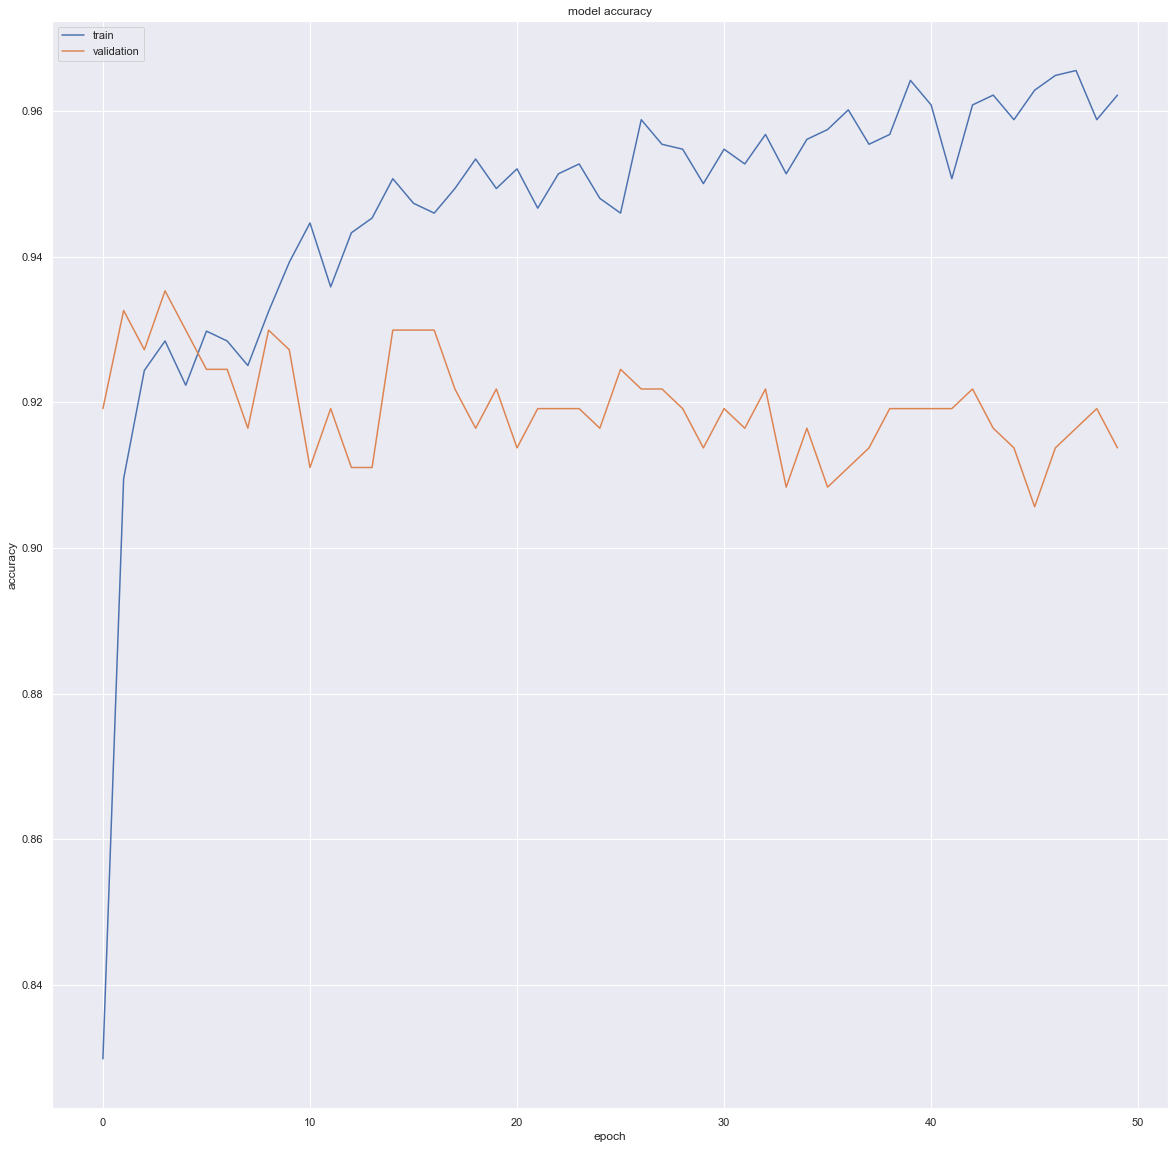

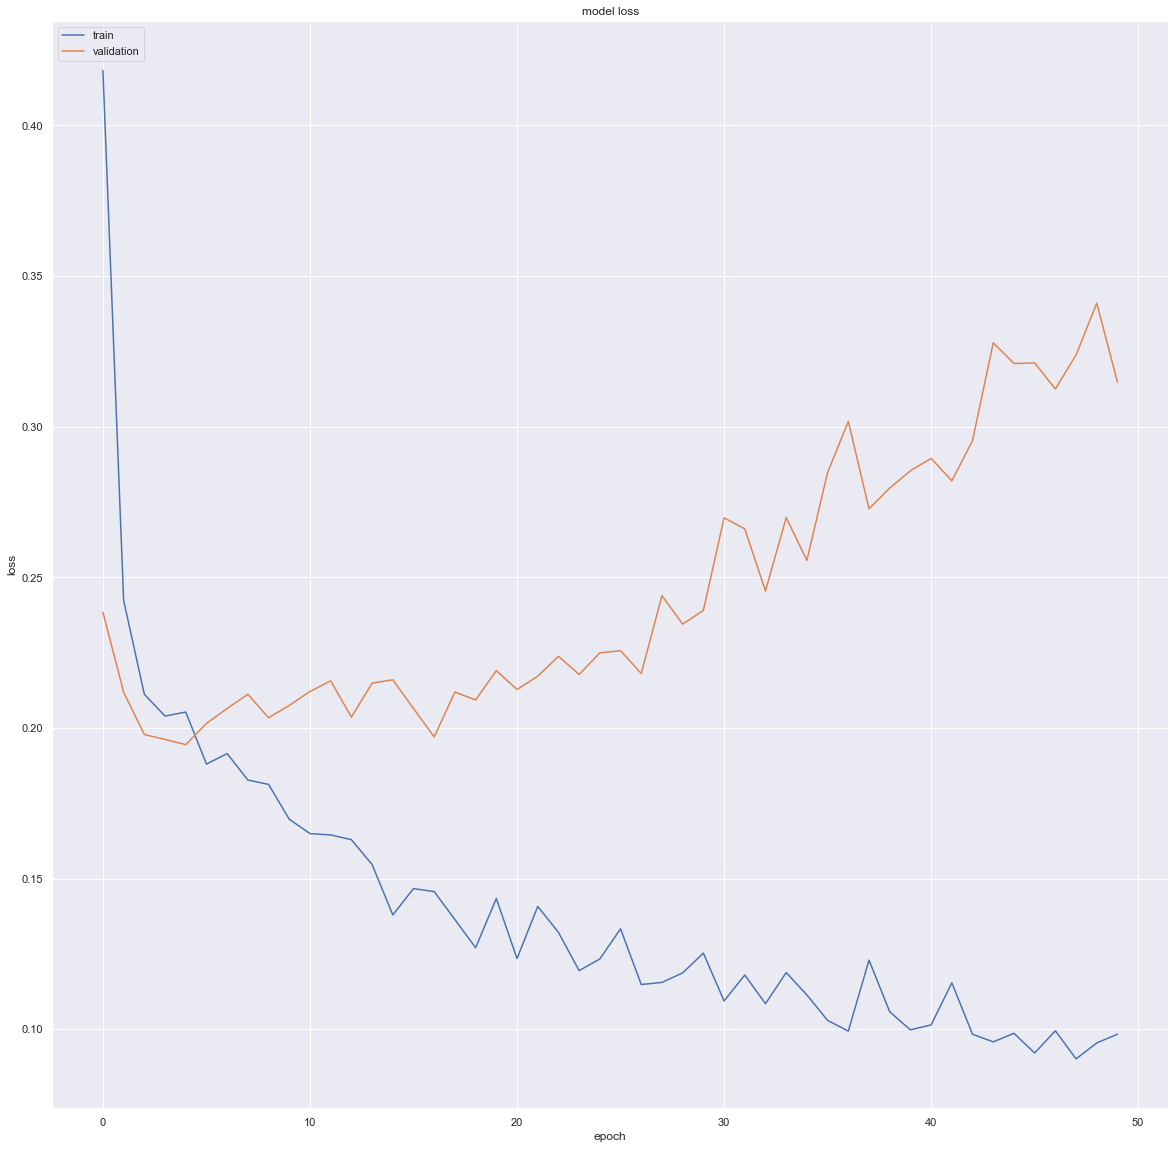

In [62]:
# Genauigkeit darstellen
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Loss Funktion darstellen
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Bei idealen Ergebnissen, wären die beiden Kurven näher beeinander und würden sich gegen 0 annähern. Da dies hier nicht der Fall ist, kann erkannt werden, dass bei dem einfachen neuronalen Netz z.T. Overfitting auf die Testdaten stattfindet. Mit einer Cross-Validation könnte dies umgangen werden.

In [63]:
# Auswertung des Modells (Genauigkeit und Confusion Matrix)
prediction = (model.predict(x_test_normalized) > 0.5).astype("int32")
accuracy_1 = accuracy_score(y_test, prediction)
confusion_matrix_1 = confusion_matrix(y_test, prediction)
print(accuracy_1)
print(confusion_matrix_1)

0.8559782608695652
[[284  23]
 [ 30  31]]


In [64]:
# Zum Vergleich ein tieferes Neuronales Netz

model=Sequential()
model.add(Dense(128,activation='relu', kernel_initializer="truncated_normal",input_shape=(x_train_normalized.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu', kernel_initializer="truncated_normal",))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu', kernel_initializer="truncated_normal",))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid', kernel_initializer="truncated_normal"))
optimizer = Adam(lr=lr)
model.compile(loss='binary_crossentropy' ,optimizer=optimizer,metrics=['accuracy'])
model.summary()

#Training des Modells
history = model.fit(x_train_normalized, y_train, validation_data=(x_validation, y_validation),batch_size=30,epochs=50,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               6144      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

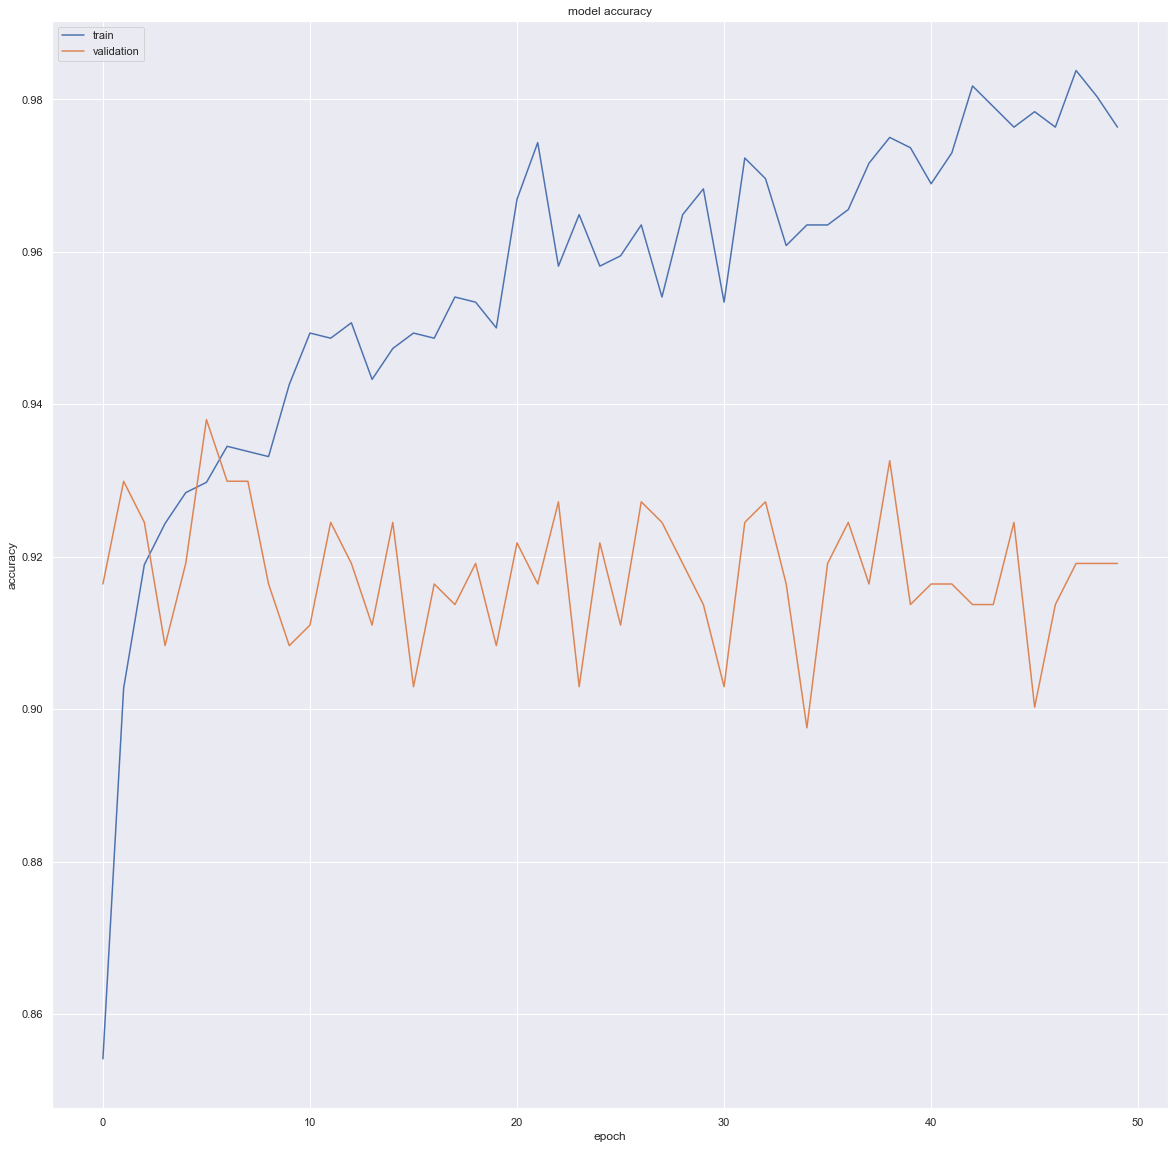

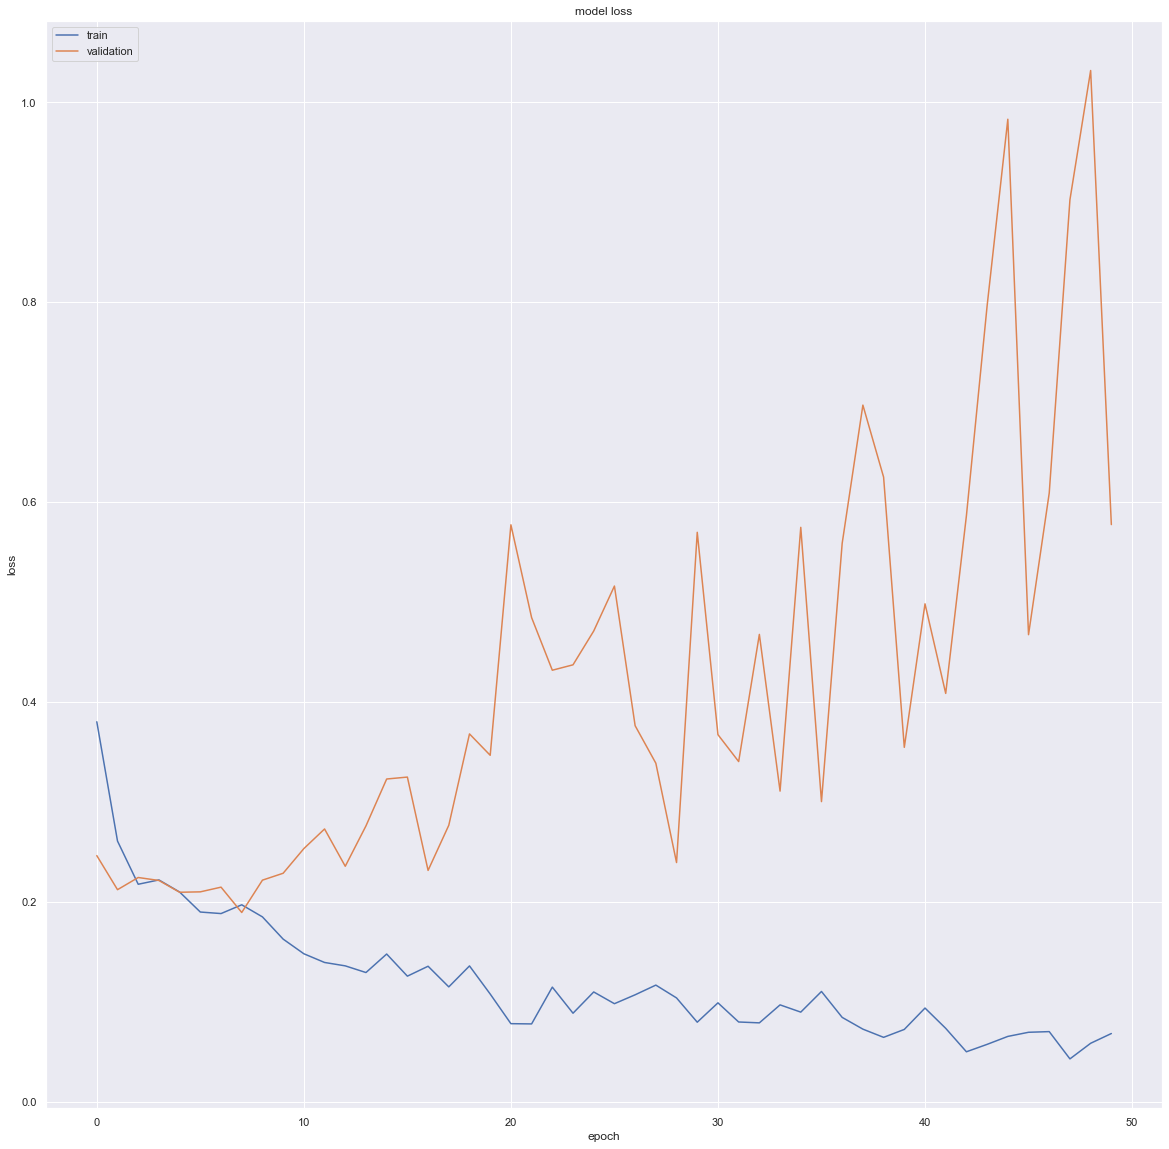

In [65]:
# Genauigkeit darstellen
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Loss Funktion darstellen
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [66]:
# Auswertung des Modells (Genauigkeit und Confusion Matrix)
prediction = (model.predict(x_test_normalized) > 0.5).astype("int32")
accuracy_2 = accuracy_score(y_test, prediction)
print(accuracy_2)
print(confusion_matrix(y_test, prediction))

0.8288043478260869
[[287  20]
 [ 43  18]]


In [67]:
# Feststellen welches Neuronale Netz bessere Ergebnisse erzielen konnte

if accuracy_1 > accuracy_2:
    max_accuracy = accuracy_1
    max_confusion_matrix = confusion_matrix_1
else:
    max_accuracy = accuracy_2
    max_confusion_matrix = confusion_matrix(y_test, prediction)

In [68]:
# Bestes Ergebnis in den Datensatz schreiben 
ergebnisse_df = ergebnisse_df.append({"Algorithmus": "Neural Network", "Genauigkeit":max_accuracy, "Confusion Matrix":max_confusion_matrix}, ignore_index=True)
ergebnisse_df

Algorithmus  Genauigkeit       Confusion Matrix
0  Random Forest Classifier     0.828804  [[293, 14], [49, 12]]
1  Decision Tree Classifier     0.766304  [[263, 44], [42, 19]]
2            Neural Network     0.855978  [[284, 23], [30, 31]]

<h3> Anwendung von StratifiedKFold </h3>

Aufteilung des Datensatzes in  TRAIN-TEST SPLIT

In [69]:
# Aufteilung der Daten
X = df_prep.drop(['Attrition'],axis = 1)
y = df_prep['Attrition']

skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


Erstellen der Modelle

Im Folgenden sind die Klassifizierungsalgorithmen aufgeführt, die ich zur Erstellung des Modells verwenden werde:

- Logistic Regression

Unter logistischer Regression oder Logit-Modell versteht man Regressionsanalysen zur (meist multiplen) Modellierung der Verteilung abhängiger diskreter Variablen. ... Das Logit-Modell ergibt sich aus der Annahme, dass die Fehlerterme unabhängig und identisch Gumbel-verteilt sind.

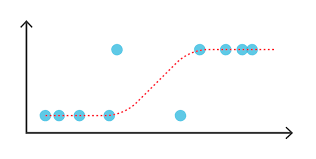

- Decision Trees

Entscheidungsbäume (englisch: decision tree) sind geordnete, gerichtete Bäume, die der Darstellung von Entscheidungsregeln dienen. Die grafische Darstellung als Baumdiagramm veranschaulicht hierarchisch aufeinanderfolgende Entscheidungen. Sie haben eine Bedeutung in zahlreichen Bereichen, in denen automatisch klassifiziert wird oder aus Erfahrungswissen formale Regeln hergeleitet oder dargestellt werden.

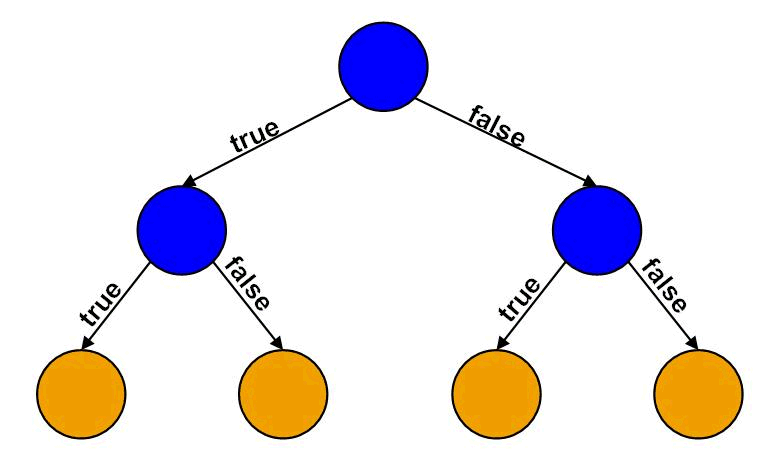


- Naive Bayes

Der naive Bayes-Klassifikator kommt unter anderem zum Einsatz, wenn es darum geht, die Wahrscheinlichkeiten der Klassen anhand einer Reihe von Beobachtungen zu bestimmen. Das Modell beruht dabei auf der Annahme, dass die Variablen je nach Klasse bedingt unabhängig sind.

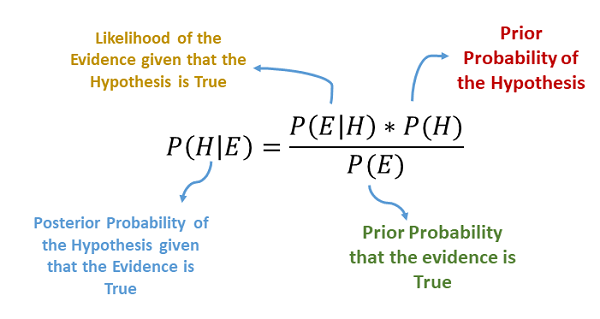

- Support Vector Machines(Linear)

Support Vector Machines (SVM) sind überwachte Algorithmen für maschinelles Lernen, die sowohl für Klassifizierungs- als auch für Regressionszwecke verwendet werden. Das folgende Beispiel ist auf eine Klassifizierungsaufgabe ausgerichtet.


GRUNDIDEE: Es soll eine Ebene gefunden werden, die einen Datensatz am besten in zwei Klassen unterteilt. Die Ebene (= Hyperebene) kann im 2- oder 3-dimensionalen Raum liegen.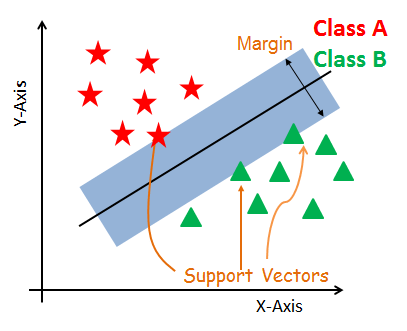

- Random Forest Classifier

Ein Random Forest ist ein Klassifikations- und Regressionsverfahren, das aus mehreren unkorrelierten Entscheidungsbäumen besteht. Er erforschte verschiedene Methoden der Randomisierung von Entscheidungsbäumen, beispielsweise mittels Bagging oder Boosting.

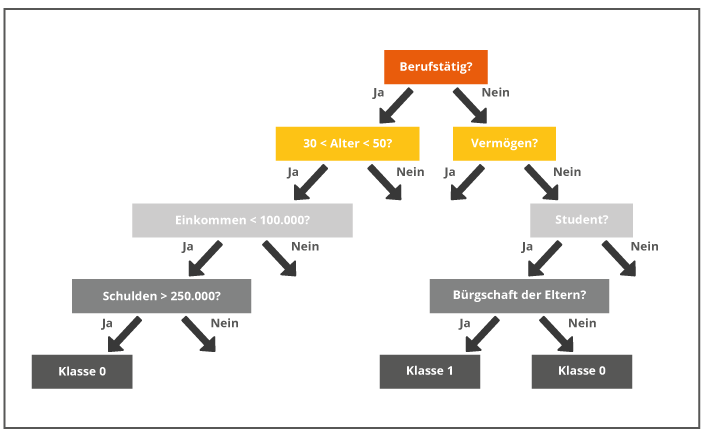

In [70]:
# Anwendung der Klassifizierungs Algorithmen
# Werden 5 Fach angewandt
# Modelle werden erstellt und Trainiert sowie Klassifzierung durchgeführt

skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
accuracy=[]
mean_acc = []
classifiers=['Logistic Regression','Decision Tree','Naive Bayes','Linear SVM', 'Random Forest Classifier']
models=[LogisticRegression(),DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),GaussianNB(),svm.SVC(kernel = 'linear'),RandomForestClassifier(n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = skf,scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)

# MODEL EVALUATION

Modellgenauigkeit

In [71]:
# Ergebnisse in einem neuen Dataframe speichern
models_acc_df = pd.DataFrame(accuracy,index = [classifiers])
cols = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
models_acc_df.columns = cols
models_acc_df

Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Logistic Regression       0.840136  0.846939  0.843537  0.840136  0.843537
Decision Tree             0.840136  0.836735  0.867347  0.850340  0.850340
Naive Bayes               0.785714  0.761905  0.721088  0.751701  0.734694
Linear SVM                0.840136  0.836735  0.826531  0.860544  0.843537
Random Forest Classifier  0.850340  0.853741  0.857143  0.846939  0.870748

In [72]:
# Durchschnittswerte aller Durchgänge anzeigen und speichern
models_mean_acc_df = pd.DataFrame(mean_acc,index = [classifiers])
models_mean_acc_df.columns = ['Mean Accuracy']
models_mean_acc_df.sort_values(by = "Mean Accuracy", ascending=False)

Mean Accuracy
Random Forest Classifier       0.855782
Decision Tree                  0.848980
Logistic Regression            0.842857
Linear SVM                     0.841497
Naive Bayes                    0.751020

<AxesSubplot:>

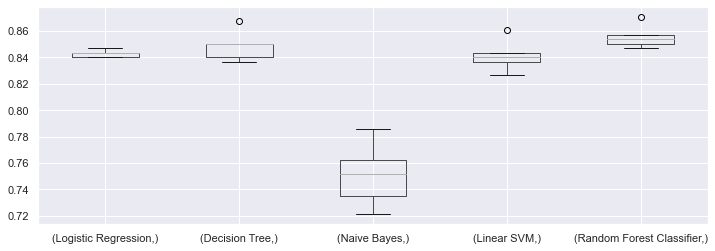

In [73]:
# Boxplot der verschiedenen Algorithmen

plt.subplots(figsize=(12,4))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

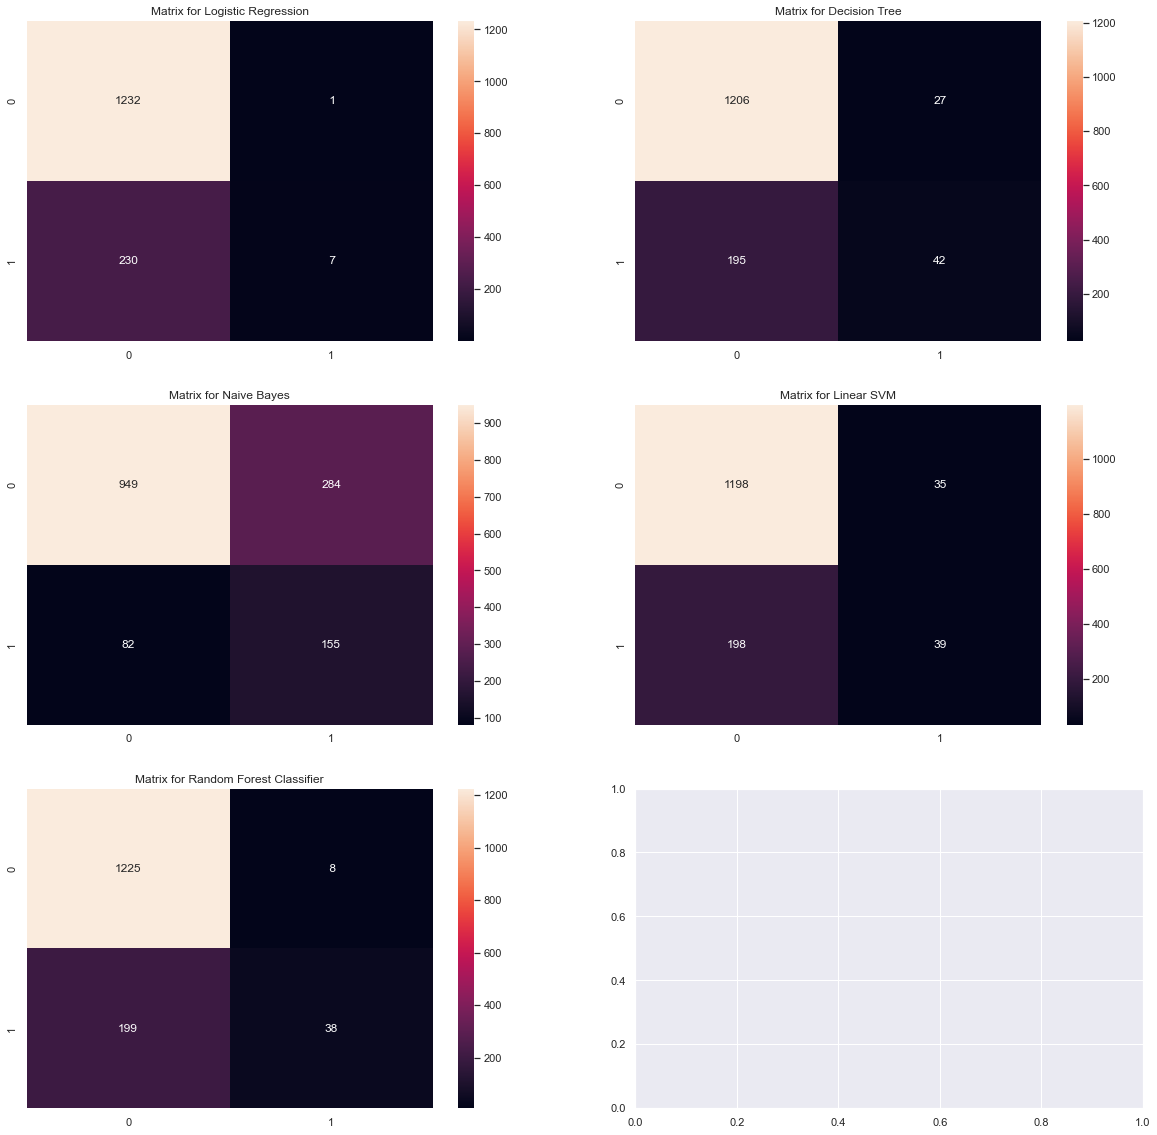

In [74]:
# Darstellung der Confusion Matrix der verschiedenen Algorithmen

f,ax=plt.subplots(3,2,figsize=(20,20))

# Logistic Regression
y_pred = cross_val_predict(LogisticRegression(),X,y,cv= skf)
c_reportLR = classification_report(y,y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0][0],annot=True,fmt='2.0f')
ax[0][0].set_title('Matrix for Logistic Regression')

# Decision Tree
y_pred = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),X,y,cv= skf)
c_reportDT = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0][1],annot=True,fmt='2.0f')
ax[0][1].set_title('Matrix for Decision Tree')

# GussianNB
y_pred = cross_val_predict(GaussianNB(),X,y,cv= skf)
c_reportNB = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1][0],annot=True,fmt='2.0f')
ax[1][0].set_title('Matrix for Naive Bayes')

# SVC
y_pred = cross_val_predict(svm.SVC(kernel = 'linear'),X,y,cv = skf)
c_reportSVM = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax = ax[1][1],annot = True, fmt = '2.0f')
ax[1][1].set_title('Matrix for Linear SVM')

# Random Forest
y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X,y,cv = skf)
c_reportRFM = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred), ax = ax[2][0], annot = True, fmt = '2.0f')
ax[2][0].set_title('Matrix for Random Forest Classifier')
plt.show()


# CLASSIFICATION REPORT OF ALL THE MODELS

LOGISTIC REGRESSION

In [75]:
print(c_reportLR)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1233
           1       0.88      0.03      0.06       237

    accuracy                           0.84      1470
   macro avg       0.86      0.51      0.49      1470
weighted avg       0.85      0.84      0.78      1470



DECISION TREE

In [76]:
print(c_reportDT)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1233
           1       0.61      0.18      0.27       237

    accuracy                           0.85      1470
   macro avg       0.73      0.58      0.60      1470
weighted avg       0.82      0.85      0.81      1470



NAIVE BAYES

In [77]:
print(c_reportNB)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1233
           1       0.35      0.65      0.46       237

    accuracy                           0.75      1470
   macro avg       0.64      0.71      0.65      1470
weighted avg       0.83      0.75      0.78      1470



LINEAR SVM

In [78]:
print(c_reportSVM)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1233
           1       0.53      0.16      0.25       237

    accuracy                           0.84      1470
   macro avg       0.69      0.57      0.58      1470
weighted avg       0.80      0.84      0.80      1470



RANDOM FOREST

In [79]:
print(c_reportRFM)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.83      0.16      0.27       237

    accuracy                           0.86      1470
   macro avg       0.84      0.58      0.60      1470
weighted avg       0.85      0.86      0.82      1470



<h2> Vergleich aller Modelle

In [80]:
# Ergebnisse in gleiche Form wie Ergebnisse ohne Cross-Validation
models_mean_acc_df = models_mean_acc_df.reset_index().rename(columns={'level_0': 'Algorithmus', "Mean Accuracy": "Genauigkeit"})
# "Cross Validation" zur Beschreibung hinzufügen um Modelle unterscheiden zu können
models_mean_acc_df["Algorithmus"] = models_mean_acc_df["Algorithmus"] + " (Cross Validation)"

In [81]:
# Beide Datensätze zusammenfügen

ergebnisse_df = ergebnisse_df.drop(columns=["Confusion Matrix"])
ergebnisse_df = ergebnisse_df.append(models_mean_acc_df).reset_index(drop=True)
ergebnisse_df

Algorithmus  Genauigkeit
0                     Random Forest Classifier     0.828804
1                     Decision Tree Classifier     0.766304
2                               Neural Network     0.855978
3       Logistic Regression (Cross Validation)     0.842857
4             Decision Tree (Cross Validation)     0.848980
5               Naive Bayes (Cross Validation)     0.751020
6                Linear SVM (Cross Validation)     0.841497
7  Random Forest Classifier (Cross Validation)     0.855782

In [82]:
ergebnisse_df=ergebnisse_df.sort_values(by="Genauigkeit", ascending=False).reset_index(drop=True)
ergebnisse_df

Algorithmus  Genauigkeit
0                               Neural Network     0.855978
1  Random Forest Classifier (Cross Validation)     0.855782
2             Decision Tree (Cross Validation)     0.848980
3       Logistic Regression (Cross Validation)     0.842857
4                Linear SVM (Cross Validation)     0.841497
5                     Random Forest Classifier     0.828804
6                     Decision Tree Classifier     0.766304
7               Naive Bayes (Cross Validation)     0.751020

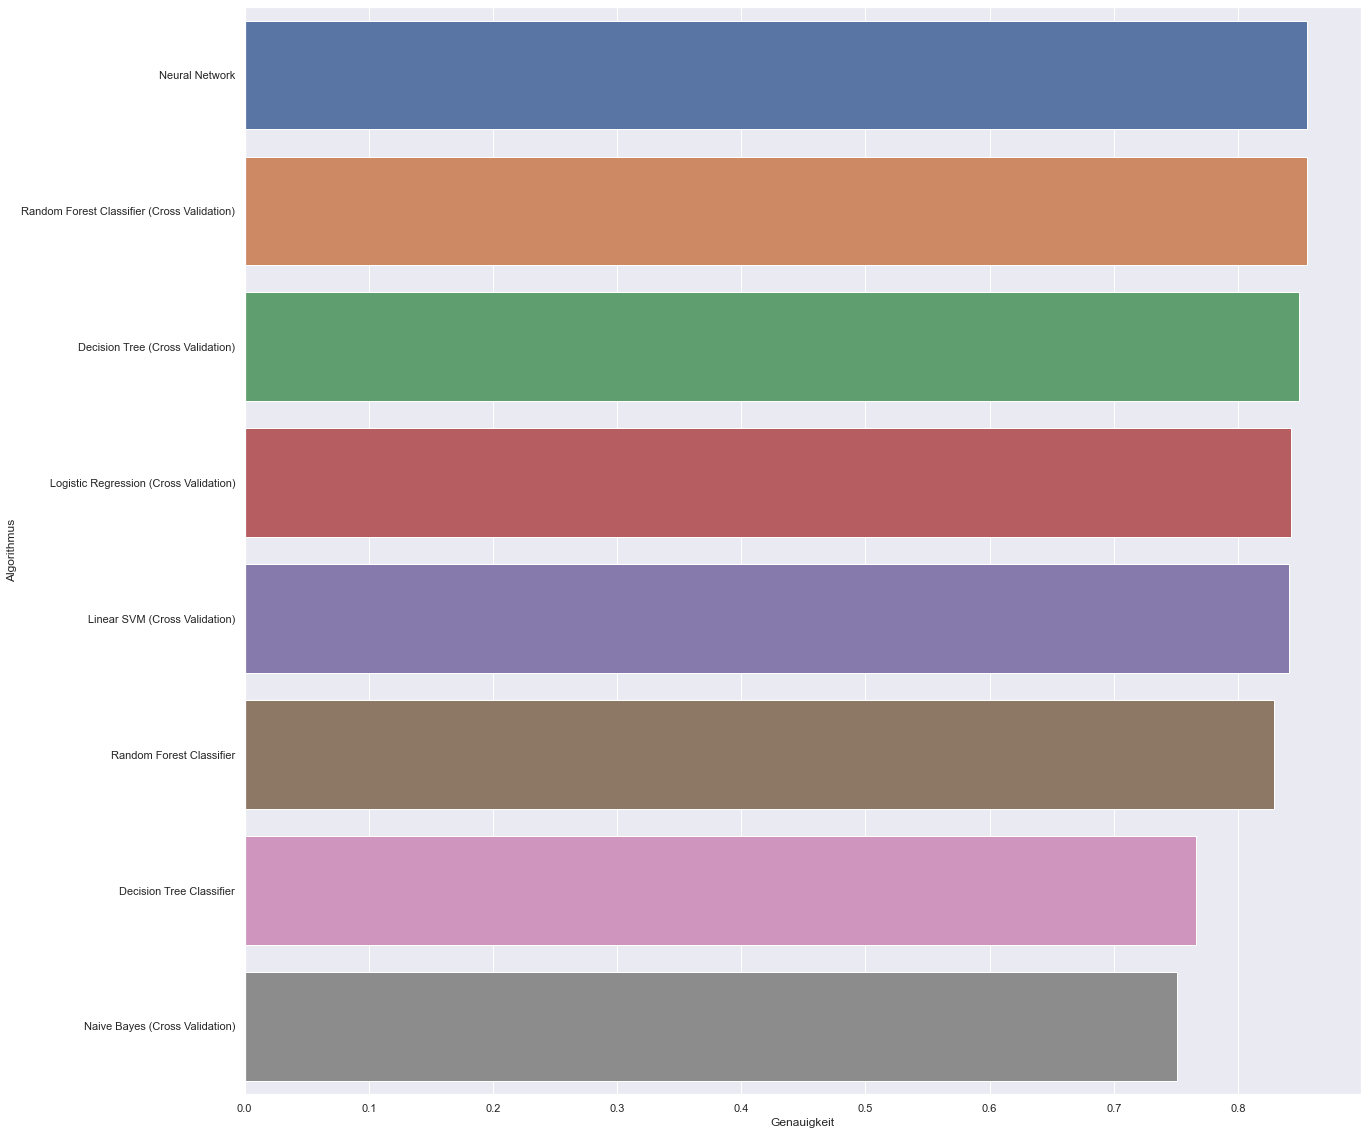

In [83]:
sns.barplot(x=ergebnisse_df["Genauigkeit"],
        y=ergebnisse_df["Algorithmus"])
plt.show()

<h2> Ergebnisse </h2>

Der Algorithmus mit der höchsten Genauigkeit ist das Neural Network mit einer Genauigkeit von 85,598%, dich gefolgt vom Random Forest Classifier (85,578%). Hierbei konnte klar gezeigt werden, dass die Verwendung von Cross Validation zu besseren Ergebnissen führt, da das Training eines "Standard" Random Forest Classifiers nur schlechtere Ergebnisse erzielen konnte (ca. 84,29%). Auch der Decision Tree Classification Algorithmus konnte sehr gut Ergebnisse erzielen.

Überraschend war das Ergebnis des Neural Networks: Zwischen dem "kleinen" und dem "tiefen" neuronalen Netz gab es keine nennenswerten Unterschiede in der Genauigkeit. Da kein random_state festgelegt wurde, variieren die Ergebnisse beider Algorithmen um +/- 1%. Mit einer Genauigkeit von ~85,6% ist es in dieser Situation auf jeden Fall eine sinnvolle Alternative zu den klassischeren Algorithmen. 

In [84]:
ergebnisse_df.set_index("Algorithmus")

Genauigkeit
Algorithmus                                             
Neural Network                                  0.855978
Random Forest Classifier (Cross Validation)     0.855782
Decision Tree (Cross Validation)                0.848980
Logistic Regression (Cross Validation)          0.842857
Linear SVM (Cross Validation)                   0.841497
Random Forest Classifier                        0.828804
Decision Tree Classifier                        0.766304
Naive Bayes (Cross Validation)                  0.751020